In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import ast
from pycombat import Combat
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D

# Visualização geral das colunas dos datasets nas próximas células

**Preparar o dataset proveniente do Pylidc**

In [ ]:
data= pd.read_csv('features_pylidc.csv', index_col=False)
data.head()

,patient_id,scan_id,nodule_id,num_annotations,slice_thickness,pixel_spacing,subtlety,internalStructure,calcification,sphericity,margin,lobulation,spiculation,texture,diameter,surface_area,volume,malignancy
0,LIDC-IDRI-0078,1,1,4,3.0,0.650,5,1,6,4,4,2,2,5,19.500000,1135.239277,2621.823750,3
1,LIDC-IDRI-0078,1,2,4,3.0,0.650,5,1,6,4,2,4,1,5,20.840585,1124.125177,2439.303750,3
2,LIDC-IDRI-0078,1,3,1,3.0,0.650,4,1,5,5,5,1,1,5,5.076662,66.910605,62.107500,1
3,LIDC-IDRI-0078,1,4,4,3.0,0.650,5,1,6,4,2,4,3,5,23.300483,1650.898027,4332.315000,5
4,LIDC-IDRI-0069,2,1,4,2.0,0.741,3,1,6,5,5,5,5,5,12.683877,505.336348,803.854584,3


In [ ]:
#Contar o número de valores únicos na coluna patient_id
print(len(np.unique(data.patient_id)))
data.inf()

870
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2637 entries, 0 to 2636
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   patient_id         2637 non-null   object 
 1   scan_id            2637 non-null   int64  
 2   nodule_id          2637 non-null   int64  
 3   num_annotations    2637 non-null   int64  
 4   slice_thickness    2637 non-null   float64
 5   pixel_spacing      2637 non-null   float64
 6   subtlety           2637 non-null   int64  
 7   internalStructure  2637 non-null   int64  
 8   calcification      2637 non-null   int64  
 9   sphericity         2637 non-null   int64  
 10  margin             2637 non-null   int64  
 11  lobulation         2637 non-null   int64  
 12  spiculation        2637 non-null   int64  
 13  texture            2637 non-null   int64  
 14  diameter           2637 non-null   float64
 15  surface_area       2637 non-null   float64
 16  volume             2

In [ ]:
data.describe()

,scan_id,nodule_id,num_annotations,slice_thickness,pixel_spacing,subtlety,internalStructure,calcification,sphericity,margin,lobulation,spiculation,texture,diameter,surface_area,volume,malignancy
count,2637.000000,2637.000000,2637.000000,2637.000000,2637.000000,2637.000000,2637.000000,2637.000000,2637.000000,2637.000000,2637.000000,2637.000000,2637.000000,2637.000000,2637.000000,2637.000000,2637.000000
mean,507.028821,3.164960,2.570345,1.882537,0.687641,3.924915,1.014790,5.700038,3.958665,4.114524,1.703451,1.562761,4.468714,10.141074,379.194299,635.284193,2.896852
std,301.467691,2.783081,1.229105,0.747657,0.083183,1.167194,0.204672,0.892502,0.905324,1.153837,1.106626,1.052647,1.189654,6.835266,719.313128,1809.038586,1.110022
min,1.000000,1.000000,1.000000,0.600000,0.460938,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.544731,9.744529,6.801801,1.000000
25%,231.000000,1.000000,1.000000,1.250000,0.632812,3.000000,1.000000,6.000000,3.000000,4.000000,1.000000,1.000000,5.000000,6.086504,82.853124,62.292480,2.000000
50%,499.000000,2.000000,3.000000,2.000000,0.693359,4.000000,1.000000,6.000000,4.000000,5.000000,1.000000,1.000000,5.000000,7.812500,138.600348,121.124268,3.000000
75%,784.000000,4.000000,4.000000,2.500000,0.742188,5.000000,1.000000,6.000000,5.000000,5.000000,2.000000,2.000000,5.000000,11.033418,296.261006,325.503706,3.000000
max,1018.000000,23.000000,4.000000,5.000000,0.976562,5.000000,5.000000,6.000000,5.000000,5.000000,5.000000,5.000000,5.000000,49.944618,9026.567042,31112.197113,5.000000


In [ ]:
#Organizar o dataset
data.sort_values(by=['patient_id', 'scan_id' ,'nodule_id'], inplace=True)
data

,patient_id,scan_id,nodule_id,num_annotations,slice_thickness,pixel_spacing,subtlety,internalStructure,calcification,sphericity,margin,lobulation,spiculation,texture,diameter,surface_area,volume,malignancy
32,LIDC-IDRI-0001,12,1,4,2.50,0.703125,5,1,6,3,4,3,5,5,32.205888,2801.428431,7869.369507,5
33,LIDC-IDRI-0002,13,1,2,1.25,0.681641,2,1,6,5,2,1,1,2,30.023172,2880.758652,6576.900681,5
34,LIDC-IDRI-0003,14,1,1,2.50,0.820312,1,1,6,5,2,1,1,1,31.664468,1996.252117,4731.410934,2
35,LIDC-IDRI-0003,14,2,4,2.50,0.820312,5,1,6,4,3,2,2,4,30.351544,1923.004803,5190.673222,5
36,LIDC-IDRI-0003,14,3,4,2.50,0.820312,4,1,6,5,4,1,2,5,13.353712,315.095332,437.392655,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1663,LIDC-IDRI-1011,644,1,4,2.50,0.859375,5,4,6,5,4,1,5,5,29.682668,1955.090475,6214.691162,4
1664,LIDC-IDRI-1011,644,2,4,2.50,0.859375,5,1,6,3,4,3,1,5,44.662703,2500.239511,6000.518799,5
1665,LIDC-IDRI-1011,644,3,4,2.50,0.859375,5,1,6,4,3,4,4,5,21.553015,889.835499,1836.158752,5
1666,LIDC-IDRI-1011,644,4,1,2.50,0.859375,1,1,6,4,2,1,1,1,6.544805,92.857224,92.315674,2


O seguinte código foi corrido num notebook separado, com o objetivo de obter apenas os pacientes que realizaram scans em apenas um *Manufacturer*.

In [ ]:
data= pd.read_csv('LIDC-IDRI_MetaData.csv', index_col=False)

prob= pd.read_csv('problematic_nodules.csv', index_col=False)

valores_a_remover = data['Subject_ID'].isin(prob['patient_id'])
filtered_data= data[~valores_a_remover]


manufacturer_por_paciente = filtered_data.groupby('Subject_ID')['Manufacturer'].nunique().reset_index()

# 2. Filtrar pacientes que têm apenas 1 fabricante
pacientes_unico_manufacturer = manufacturer_por_paciente[manufacturer_por_paciente['Manufacturer'] == 1]

# 3. Obter os fabricantes associados a esses pacientes
# Aqui, vamos filtrar o DataFrame original para incluir apenas os pacientes filtrados
dados_unico_manufacturer = filtered_data[filtered_data['Subject_ID'].isin(pacientes_unico_manufacturer['Subject_ID'])]

# 4. Selecionar apenas as colunas 'Subject_ID' e 'Manufacturer' para o novo DataFrame
dados_exportar = dados_unico_manufacturer[['Subject_ID', 'Manufacturer']].drop_duplicates()

dados_exportar.to_csv('Data_Patient_Manufacturer.csv', sep=',', index=False)

In [ ]:
pm = pd.read_csv('Data_Patient_Manufacturer.csv', index_col=False)

data = pd.merge(data,pm , on='patient_id', how='inner')
data

,patient_id,scan_id,nodule_id,num_annotations,slice_thickness,pixel_spacing,subtlety,internalStructure,calcification,sphericity,margin,lobulation,spiculation,texture,diameter,surface_area,volume,malignancy,Manufacturer
0,LIDC-IDRI-0001,12,1,4,2.50,0.703125,5,1,6,3,4,3,5,5,32.205888,2801.428431,7869.369507,5,GE MEDICAL SYSTEMS
1,LIDC-IDRI-0002,13,1,2,1.25,0.681641,2,1,6,5,2,1,1,2,30.023172,2880.758652,6576.900681,5,GE MEDICAL SYSTEMS
2,LIDC-IDRI-0003,14,1,1,2.50,0.820312,1,1,6,5,2,1,1,1,31.664468,1996.252117,4731.410934,2,GE MEDICAL SYSTEMS
3,LIDC-IDRI-0003,14,2,4,2.50,0.820312,5,1,6,4,3,2,2,4,30.351544,1923.004803,5190.673222,5,GE MEDICAL SYSTEMS
4,LIDC-IDRI-0003,14,3,4,2.50,0.820312,4,1,6,5,4,1,2,5,13.353712,315.095332,437.392655,4,GE MEDICAL SYSTEMS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2474,LIDC-IDRI-1011,644,1,4,2.50,0.859375,5,4,6,5,4,1,5,5,29.682668,1955.090475,6214.691162,4,GE MEDICAL SYSTEMS
2475,LIDC-IDRI-1011,644,2,4,2.50,0.859375,5,1,6,3,4,3,1,5,44.662703,2500.239511,6000.518799,5,GE MEDICAL SYSTEMS
2476,LIDC-IDRI-1011,644,3,4,2.50,0.859375,5,1,6,4,3,4,4,5,21.553015,889.835499,1836.158752,5,GE MEDICAL SYSTEMS
2477,LIDC-IDRI-1011,644,4,1,2.50,0.859375,1,1,6,4,2,1,1,1,6.544805,92.857224,92.315674,2,GE MEDICAL SYSTEMS


Perceber a distribuição da target class *malignancy*

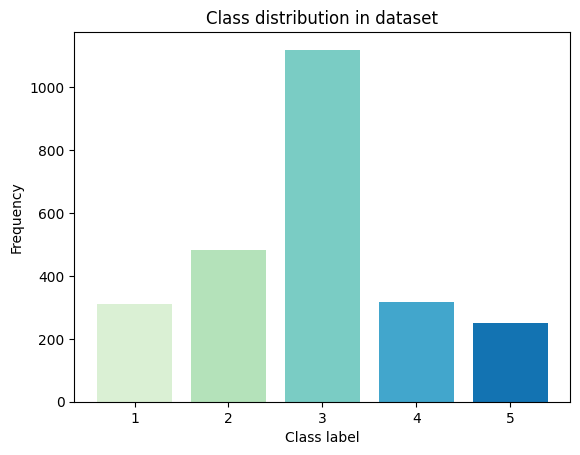

[1 2 3 4 5] [ 310  482 1119  318  250]


In [ ]:
unique_labels, counts = np.unique(data.malignancy, return_counts=True)
palette = sns.color_palette("GnBu", len(unique_labels))

plt.bar(unique_labels, counts, color=palette)
plt.xlabel('Class label')
plt.ylabel('Frequency')
plt.title('Class distribution in dataset')
plt.show()

print(unique_labels, counts)

Optámos por reclassificar os valores da target *malignancy* em 3 classes, de forma a tornar os dados menos densos e facilitar a posterior avaliação dos modelos de classificação. A transformação das 3 classes foi a seguinte:

> -1 : 'Highly Unlikely' (1) e 'Moderately Unlikely' (2)

> 0 : 'Indeterminate' (3)

> 1 : 'Moderately Suspicious' (4) e 'Highly Suspicious' (5)

In [ ]:
for i in range(len(data)):
    if data.at[i,'malignancy'] == 1 or data.at[i,'malignancy'] == 2:
        data.at[i,'malignancy'] = -1
    elif data.at[i,'malignancy'] == 4 or data.at[i,'malignancy'] == 5:
        data.at[i,'malignancy'] = 1
    else:
        data.at[i,'malignancy'] = 0

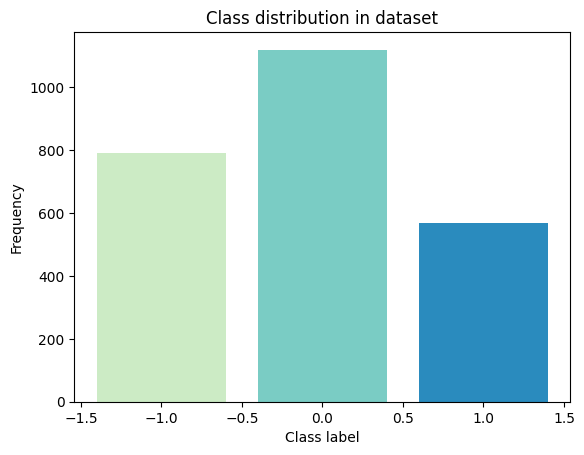

[-1  0  1] [ 792 1119  568]


In [ ]:
unique_labels, counts = np.unique(data.malignancy, return_counts=True)
palette = sns.color_palette("GnBu", len(unique_labels))

plt.bar(unique_labels, counts, color=palette)
plt.xlabel('Class label')
plt.ylabel('Frequency')
plt.title('Class distribution in dataset')
plt.show()

print(unique_labels, counts)

Lidar com os casos indeterminados

Após a transformação das classes, observamos um elevado número de casos inderterminados (0). Para esta situação ser evitada, os valores 0 foram substiuidos com base nos restantes valores do mesmo scan de nódulos (-1 e 1).

Ou seja, em scans que continham tanto valores indeterminados (0), como valores definidos de malignidade -1 e 1, os valores 0 foram substituídos pelo mais frequente por scan.
No entanto, para scans onde os únicos valores eram 0, estes permaneceram inalterados, pois não havia uma tendência definida.

In [ ]:
def most_common_class(group):
    #Verifica se todos os nódulos têm malignidade 0
    if (group['malignancy'] == 0).all():
        return group['malignancy']  # Mantém todos como 0
    else:
        #Conta as ocorrências de -1 e 1
        negative_ones = (group['malignancy'] == -1).sum()
        positive_ones = (group['malignancy'] == 1).sum()

        #Caso haja nódulos com -1 ou 1
        if negative_ones > 0 or positive_ones > 0:
            # Se houver empate, prefere 1
            if negative_ones == positive_ones:
                replacement_value = 1
            else:
                #Caso contrário, escolhe o valor mais frequente
                replacement_value = -1 if negative_ones > positive_ones else 1

            #Somente substitui valores de malignidade 0
            return group['malignancy'].apply(lambda x: replacement_value if x == 0 else x)
        else:
            #Caso não haja -1 ou 1, mantém os valores como estão
            return group['malignancy']

In [ ]:
#Aplicar a função ao dataset por scan_id
data['malignancy'] = data.groupby('scan_id').apply(most_common_class).reset_index(level=0, drop=True)

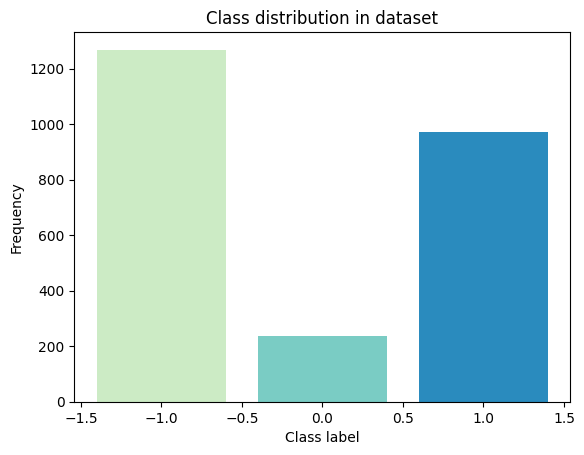

[-1  0  1] [1268  238  973]


In [ ]:
#Gráfico de barras para mostrar a distribuição das classes, na coluna malignancy após a reclassificação
unique_labels, counts = np.unique(data.malignancy, return_counts=True)
palette = sns.color_palette("GnBu", len(unique_labels))

plt.bar(unique_labels, counts, color=palette)
plt.xlabel('Class label')
plt.ylabel('Frequency')
plt.title('Class distribution in dataset')
plt.show()

print(unique_labels, counts)

Eliminar os Indeterminados

Resolvemos também, de forma a facilitar o treino e a avaliação dos modelos de classificação, eliminar todas as linhas do dataset onde a coluna *malignancy* é igual a 0. Assim, ficamos apenas com linhas onde *malignancy* é -1 ou 1.

In [ ]:
#Remove as linhas onde a coluna 'malignancy' é igual a 0 usando pandas
data = data.drop(data[data['malignancy'] == 0].index)
data

,patient_id,scan_id,nodule_id,num_annotations,slice_thickness,pixel_spacing,subtlety,internalStructure,calcification,sphericity,margin,lobulation,spiculation,texture,diameter,surface_area,volume,malignancy,Manufacturer
0,LIDC-IDRI-0001,12,1,4,2.50,0.703125,5,1,6,3,4,3,5,5,32.205888,2801.428431,7869.369507,1,GE MEDICAL SYSTEMS
1,LIDC-IDRI-0002,13,1,2,1.25,0.681641,2,1,6,5,2,1,1,2,30.023172,2880.758652,6576.900681,1,GE MEDICAL SYSTEMS
2,LIDC-IDRI-0003,14,1,1,2.50,0.820312,1,1,6,5,2,1,1,1,31.664468,1996.252117,4731.410934,-1,GE MEDICAL SYSTEMS
3,LIDC-IDRI-0003,14,2,4,2.50,0.820312,5,1,6,4,3,2,2,4,30.351544,1923.004803,5190.673222,1,GE MEDICAL SYSTEMS
4,LIDC-IDRI-0003,14,3,4,2.50,0.820312,4,1,6,5,4,1,2,5,13.353712,315.095332,437.392655,1,GE MEDICAL SYSTEMS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2474,LIDC-IDRI-1011,644,1,4,2.50,0.859375,5,4,6,5,4,1,5,5,29.682668,1955.090475,6214.691162,1,GE MEDICAL SYSTEMS
2475,LIDC-IDRI-1011,644,2,4,2.50,0.859375,5,1,6,3,4,3,1,5,44.662703,2500.239511,6000.518799,1,GE MEDICAL SYSTEMS
2476,LIDC-IDRI-1011,644,3,4,2.50,0.859375,5,1,6,4,3,4,4,5,21.553015,889.835499,1836.158752,1,GE MEDICAL SYSTEMS
2477,LIDC-IDRI-1011,644,4,1,2.50,0.859375,1,1,6,4,2,1,1,1,6.544805,92.857224,92.315674,-1,GE MEDICAL SYSTEMS


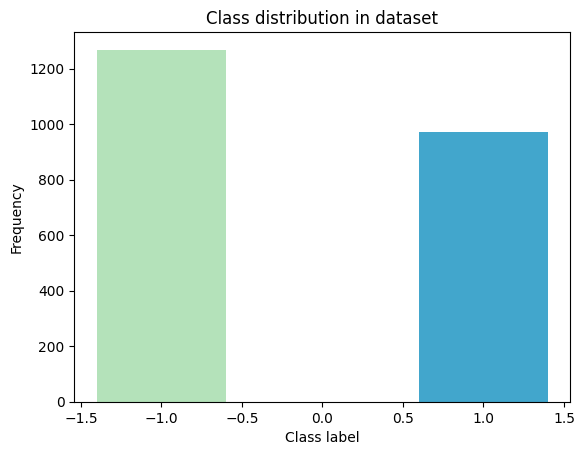

[-1  1] [1268  973]


In [ ]:
unique_labels, counts = np.unique(data.malignancy, return_counts=True)
palette = sns.color_palette("GnBu", len(unique_labels))

plt.bar(unique_labels, counts, color=palette)
plt.xlabel('Class label')
plt.ylabel('Frequency')
plt.title('Class distribution in dataset')
plt.show()

print(unique_labels, counts)

Criamos também uma nova coluna, *Id*, que combina os valores *patient_id*, *scan_id* e *nodule_id*, funcionando como identificador único para cada linha. Posto isto, removemos as colunas *scan_id*, *patient_id* e *nodule_id*.

In [ ]:
#Cria um identificador único 'Id' para cada linha no DataFrame usando patient_id, scan_id, e nodule_id
data['Id'] = data.apply(lambda row: f"{row['patient_id']}-{row['scan_id']}-{row['nodule_id']}", axis=1)
data

,patient_id,scan_id,nodule_id,num_annotations,slice_thickness,pixel_spacing,subtlety,internalStructure,calcification,sphericity,margin,lobulation,spiculation,texture,diameter,surface_area,volume,malignancy,Manufacturer,Id
0,LIDC-IDRI-0001,12,1,4,2.50,0.703125,5,1,6,3,4,3,5,5,32.205888,2801.428431,7869.369507,1,GE MEDICAL SYSTEMS,LIDC-IDRI-0001-12-1
1,LIDC-IDRI-0002,13,1,2,1.25,0.681641,2,1,6,5,2,1,1,2,30.023172,2880.758652,6576.900681,1,GE MEDICAL SYSTEMS,LIDC-IDRI-0002-13-1
2,LIDC-IDRI-0003,14,1,1,2.50,0.820312,1,1,6,5,2,1,1,1,31.664468,1996.252117,4731.410934,-1,GE MEDICAL SYSTEMS,LIDC-IDRI-0003-14-1
3,LIDC-IDRI-0003,14,2,4,2.50,0.820312,5,1,6,4,3,2,2,4,30.351544,1923.004803,5190.673222,1,GE MEDICAL SYSTEMS,LIDC-IDRI-0003-14-2
4,LIDC-IDRI-0003,14,3,4,2.50,0.820312,4,1,6,5,4,1,2,5,13.353712,315.095332,437.392655,1,GE MEDICAL SYSTEMS,LIDC-IDRI-0003-14-3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2474,LIDC-IDRI-1011,644,1,4,2.50,0.859375,5,4,6,5,4,1,5,5,29.682668,1955.090475,6214.691162,1,GE MEDICAL SYSTEMS,LIDC-IDRI-1011-644-1
2475,LIDC-IDRI-1011,644,2,4,2.50,0.859375,5,1,6,3,4,3,1,5,44.662703,2500.239511,6000.518799,1,GE MEDICAL SYSTEMS,LIDC-IDRI-1011-644-2
2476,LIDC-IDRI-1011,644,3,4,2.50,0.859375,5,1,6,4,3,4,4,5,21.553015,889.835499,1836.158752,1,GE MEDICAL SYSTEMS,LIDC-IDRI-1011-644-3
2477,LIDC-IDRI-1011,644,4,1,2.50,0.859375,1,1,6,4,2,1,1,1,6.544805,92.857224,92.315674,-1,GE MEDICAL SYSTEMS,LIDC-IDRI-1011-644-4


In [ ]:
data = data.drop(columns=['scan_id', 'patient_id', 'nodule_id'])

data.to_csv('features_pylidc_new_index.csv', sep=',', index=False)
data

,num_annotations,slice_thickness,pixel_spacing,subtlety,internalStructure,calcification,sphericity,margin,lobulation,spiculation,texture,diameter,surface_area,volume,malignancy,Manufacturer,Id
0,4,2.50,0.703125,5,1,6,3,4,3,5,5,32.205888,2801.428431,7869.369507,1,GE MEDICAL SYSTEMS,LIDC-IDRI-0001-12-1
1,2,1.25,0.681641,2,1,6,5,2,1,1,2,30.023172,2880.758652,6576.900681,1,GE MEDICAL SYSTEMS,LIDC-IDRI-0002-13-1
2,1,2.50,0.820312,1,1,6,5,2,1,1,1,31.664468,1996.252117,4731.410934,-1,GE MEDICAL SYSTEMS,LIDC-IDRI-0003-14-1
3,4,2.50,0.820312,5,1,6,4,3,2,2,4,30.351544,1923.004803,5190.673222,1,GE MEDICAL SYSTEMS,LIDC-IDRI-0003-14-2
4,4,2.50,0.820312,4,1,6,5,4,1,2,5,13.353712,315.095332,437.392655,1,GE MEDICAL SYSTEMS,LIDC-IDRI-0003-14-3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2474,4,2.50,0.859375,5,4,6,5,4,1,5,5,29.682668,1955.090475,6214.691162,1,GE MEDICAL SYSTEMS,LIDC-IDRI-1011-644-1
2475,4,2.50,0.859375,5,1,6,3,4,3,1,5,44.662703,2500.239511,6000.518799,1,GE MEDICAL SYSTEMS,LIDC-IDRI-1011-644-2
2476,4,2.50,0.859375,5,1,6,4,3,4,4,5,21.553015,889.835499,1836.158752,1,GE MEDICAL SYSTEMS,LIDC-IDRI-1011-644-3
2477,1,2.50,0.859375,1,1,6,4,2,1,1,1,6.544805,92.857224,92.315674,-1,GE MEDICAL SYSTEMS,LIDC-IDRI-1011-644-4


**Preparar o dataset proveniente do Pyradiomics**

In [ ]:
inf= pd.read_csv('features_pyradiomics.csv', index_col=False)
inf.head()

,diagnostics_Versions_PyRadiomics,diagnostics_Versions_Numpy,diagnostics_Versions_SimpleITK,diagnostics_Versions_PyWavelet,diagnostics_Versions_Python,diagnostics_Configuration_Settings,diagnostics_Configuration_EnabledImageTypes,diagnostics_Image-original_Hash,diagnostics_Image-original_Dimensionality,diagnostics_Image-original_Spacing,...,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength,patient_id,nodule_id,scan_id
0,v3.1.0,1.24.3,2.4.0,1.4.1,3.8.20,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},5eb52246a7699383ac7847a5a0478d10042d28f2,2D,"(1.0, 1.0)",...,0.001125,0.0,0.0,1000000.0,0.0,0.0,0.0,LIDC-IDRI-0001,1,12
1,v3.1.0,1.24.3,2.4.0,1.4.1,3.8.20,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},361737ea2d011b9f048963a8659d0d8bb56c142f,2D,"(1.0, 1.0)",...,0.001215,0.0,0.0,1000000.0,0.0,0.0,0.0,LIDC-IDRI-0002,1,13
2,v3.1.0,1.24.3,2.4.0,1.4.1,3.8.20,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},602489a9b2d976a60e9c6df170f05b10a19bfc05,2D,"(1.0, 1.0)",...,0.001590,0.0,0.0,1000000.0,0.0,0.0,0.0,LIDC-IDRI-0003,1,14
3,v3.1.0,1.24.3,2.4.0,1.4.1,3.8.20,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},4a5d028a0ba752432577a82d2fe59e34d48a72e6,2D,"(1.0, 1.0)",...,0.001880,0.0,0.0,1000000.0,0.0,0.0,0.0,LIDC-IDRI-0003,2,14
4,v3.1.0,1.24.3,2.4.0,1.4.1,3.8.20,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},5733313731e8dc424d3e35a6a5339a4b8706bf5c,2D,"(1.0, 1.0)",...,0.009346,0.0,0.0,1000000.0,0.0,0.0,0.0,LIDC-IDRI-0003,3,14


In [ ]:
#Conta o número de valores únicos na coluna patient_id
print(len(np.unique(inf.patient_id)))
inf.info()

873
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2613 entries, 0 to 2612
Columns: 118 entries, diagnostics_Versions_PyRadiomics to scan_id
dtypes: float64(95), int64(5), object(18)
memory usage: 2.4+ MB


In [ ]:
inf.describe()

,diagnostics_Image-original_Mean,diagnostics_Image-original_Minimum,diagnostics_Image-original_Maximum,diagnostics_Mask-original_VoxelNum,diagnostics_Mask-original_VolumeNum,original_firstorder_10Percentile,original_firstorder_90Percentile,original_firstorder_Energy,original_firstorder_Entropy,original_firstorder_InterquartileRange,...,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength,nodule_id,scan_id
count,2613.000000,2613.0,2613.000000,2613.000000,2613.000000,2613.000000,2613.000000,2613.000000,2.613000e+03,2613.000000,...,2.613000e+03,2613.000000,2613.000000,2613.0,2613.0,2613.0,2613.0,2613.0,2613.00000,2613.000000
mean,0.007529,0.0,0.627661,109.208955,1.008802,0.362107,0.591564,32.096573,-3.203427e-16,0.137364,...,8.229337e-03,0.026108,317.521017,0.0,1000000.0,0.0,0.0,0.0,3.16150,508.797551
std,0.008909,0.0,0.169323,174.221998,0.101289,0.107176,0.168969,59.981634,9.862649e-32,0.089875,...,9.214646e-02,0.025510,7791.439984,0.0,0.0,0.0,0.0,0.0,2.78614,301.483628
min,0.000150,0.0,0.196500,2.000000,1.000000,0.100550,0.188500,0.168626,-3.203427e-16,0.000000,...,-3.203427e-16,0.000527,0.000000,0.0,1000000.0,0.0,0.0,0.0,1.00000,1.000000
25%,0.002630,0.0,0.536000,29.000000,1.000000,0.285400,0.499750,5.527950,-3.203427e-16,0.080000,...,-3.203427e-16,0.010204,0.000000,0.0,1000000.0,0.0,0.0,0.0,1.00000,233.000000
50%,0.004368,0.0,0.622000,48.000000,1.000000,0.358700,0.595050,11.487220,-3.203427e-16,0.120500,...,-3.203427e-16,0.020833,0.000000,0.0,1000000.0,0.0,0.0,0.0,2.00000,504.000000
75%,0.008240,0.0,0.682500,98.000000,1.000000,0.429000,0.645000,27.710058,-3.203427e-16,0.164750,...,-3.203427e-16,0.034483,0.000000,0.0,1000000.0,0.0,0.0,0.0,4.00000,784.000000
max,0.089394,0.0,1.000000,1898.000000,3.000000,1.000000,1.000000,759.279111,-3.203427e-16,0.684375,...,1.584963e+00,0.500000,293222.250000,0.0,1000000.0,0.0,0.0,0.0,23.00000,1018.000000


In [ ]:
#Organizar o csv
inf.sort_values(by=['patient_id', 'scan_id' ,'nodule_id'], inplace=True)
inf

,diagnostics_Versions_PyRadiomics,diagnostics_Versions_Numpy,diagnostics_Versions_SimpleITK,diagnostics_Versions_PyWavelet,diagnostics_Versions_Python,diagnostics_Configuration_Settings,diagnostics_Configuration_EnabledImageTypes,diagnostics_Image-original_Hash,diagnostics_Image-original_Dimensionality,diagnostics_Image-original_Spacing,...,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength,patient_id,nodule_id,scan_id
0,v3.1.0,1.24.3,2.4.0,1.4.1,3.8.20,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},5eb52246a7699383ac7847a5a0478d10042d28f2,2D,"(1.0, 1.0)",...,0.001125,0.0,0.0,1000000.0,0.0,0.0,0.0,LIDC-IDRI-0001,1,12
1,v3.1.0,1.24.3,2.4.0,1.4.1,3.8.20,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},361737ea2d011b9f048963a8659d0d8bb56c142f,2D,"(1.0, 1.0)",...,0.001215,0.0,0.0,1000000.0,0.0,0.0,0.0,LIDC-IDRI-0002,1,13
2,v3.1.0,1.24.3,2.4.0,1.4.1,3.8.20,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},602489a9b2d976a60e9c6df170f05b10a19bfc05,2D,"(1.0, 1.0)",...,0.001590,0.0,0.0,1000000.0,0.0,0.0,0.0,LIDC-IDRI-0003,1,14
3,v3.1.0,1.24.3,2.4.0,1.4.1,3.8.20,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},4a5d028a0ba752432577a82d2fe59e34d48a72e6,2D,"(1.0, 1.0)",...,0.001880,0.0,0.0,1000000.0,0.0,0.0,0.0,LIDC-IDRI-0003,2,14
4,v3.1.0,1.24.3,2.4.0,1.4.1,3.8.20,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},5733313731e8dc424d3e35a6a5339a4b8706bf5c,2D,"(1.0, 1.0)",...,0.009346,0.0,0.0,1000000.0,0.0,0.0,0.0,LIDC-IDRI-0003,3,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2608,v3.1.0,1.24.3,2.4.0,1.4.1,3.8.20,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},1d637a3d8eaf117315612be7e447b6ff9d5b86c2,2D,"(1.0, 1.0)",...,0.001919,0.0,0.0,1000000.0,0.0,0.0,0.0,LIDC-IDRI-1011,1,644
2609,v3.1.0,1.24.3,2.4.0,1.4.1,3.8.20,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},583bc15f0c2e4cfa871126a2c0b453186aecec58,2D,"(1.0, 1.0)",...,0.002160,0.0,0.0,1000000.0,0.0,0.0,0.0,LIDC-IDRI-1011,2,644
2610,v3.1.0,1.24.3,2.4.0,1.4.1,3.8.20,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},b83fead1e7eeb2cb0d966518be5d4c3ca49ef077,2D,"(1.0, 1.0)",...,0.003125,0.0,0.0,1000000.0,0.0,0.0,0.0,LIDC-IDRI-1011,3,644
2611,v3.1.0,1.24.3,2.4.0,1.4.1,3.8.20,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},37d87b6c007d031108536a2abd326b374b402186,2D,"(1.0, 1.0)",...,0.050000,0.0,0.0,1000000.0,0.0,0.0,0.0,LIDC-IDRI-1011,4,644


Para o dataset proveniente do Pyradiomics, repetimos o processo do dataset anterior. Isto é, criamos uma nova coluna *Id*, que combina *patient_id*, *scan_id* e *nodule_id*, para uma identificação única.

In [ ]:
for i in range(len(inf)):
    inf.at[i,'Id'] = inf.at[i,'patient_id'] + '-' + str(inf.at[i,'scan_id']) + '-' + str(inf.at[i,'nodule_id'])


inf = inf[['Id'] + [col for col in inf.columns if col != 'Id']]
inf = inf.drop(columns=['scan_id', 'patient_id', 'nodule_id', 'diagnostics_Versions_PyRadiomics', 'diagnostics_Versions_Numpy', 'diagnostics_Versions_SimpleITK', 'diagnostics_Versions_PyWavelet', 'diagnostics_Versions_Python'])

inf.to_csv('features_pyradiomics_new_index.csv', sep=',', index=False)
inf

,Id,diagnostics_Configuration_Settings,diagnostics_Configuration_EnabledImageTypes,diagnostics_Image-original_Hash,diagnostics_Image-original_Dimensionality,diagnostics_Image-original_Spacing,diagnostics_Image-original_Size,diagnostics_Image-original_Mean,diagnostics_Image-original_Minimum,diagnostics_Image-original_Maximum,...,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
0,LIDC-IDRI-0001-12-1,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},5eb52246a7699383ac7847a5a0478d10042d28f2,2D,"(1.0, 1.0)","(104, 112)",0.046327,0.0,0.6900,...,0.000001,0.000001,-3.203427e-16,0.001125,0.0,0.0,1000000.0,0.0,0.0,0.0
1,LIDC-IDRI-0002-13-1,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},361737ea2d011b9f048963a8659d0d8bb56c142f,2D,"(1.0, 1.0)","(110, 105)",0.019601,0.0,0.6420,...,0.000001,0.000001,-3.203427e-16,0.001215,0.0,0.0,1000000.0,0.0,0.0,0.0
2,LIDC-IDRI-0003-14-1,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},602489a9b2d976a60e9c6df170f05b10a19bfc05,2D,"(1.0, 1.0)","(94, 96)",0.018470,0.0,0.5670,...,0.000003,0.000003,-3.203427e-16,0.001590,0.0,0.0,1000000.0,0.0,0.0,0.0
3,LIDC-IDRI-0003-14-2,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},4a5d028a0ba752432577a82d2fe59e34d48a72e6,2D,"(1.0, 1.0)","(105, 100)",0.027185,0.0,0.7020,...,0.000004,0.000004,-3.203427e-16,0.001880,0.0,0.0,1000000.0,0.0,0.0,0.0
4,LIDC-IDRI-0003-14-3,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},5733313731e8dc424d3e35a6a5339a4b8706bf5c,2D,"(1.0, 1.0)","(79, 73)",0.008807,0.0,0.6075,...,0.000087,0.000087,-3.203427e-16,0.009346,0.0,0.0,1000000.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2608,LIDC-IDRI-1011-644-1,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},1d637a3d8eaf117315612be7e447b6ff9d5b86c2,2D,"(1.0, 1.0)","(94, 89)",0.019127,0.0,0.6665,...,0.000004,0.000004,-3.203427e-16,0.001919,0.0,0.0,1000000.0,0.0,0.0,0.0
2609,LIDC-IDRI-1011-644-2,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},583bc15f0c2e4cfa871126a2c0b453186aecec58,2D,"(1.0, 1.0)","(113, 94)",0.024537,0.0,0.6655,...,0.000005,0.000005,-3.203427e-16,0.002160,0.0,0.0,1000000.0,0.0,0.0,0.0
2610,LIDC-IDRI-1011-644-3,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},b83fead1e7eeb2cb0d966518be5d4c3ca49ef077,2D,"(1.0, 1.0)","(86, 90)",0.023803,0.0,0.6690,...,0.000010,0.000010,-3.203427e-16,0.003125,0.0,0.0,1000000.0,0.0,0.0,0.0
2611,LIDC-IDRI-1011-644-4,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},37d87b6c007d031108536a2abd326b374b402186,2D,"(1.0, 1.0)","(69, 69)",0.001190,0.0,0.3350,...,0.002500,0.002500,-3.203427e-16,0.050000,0.0,0.0,1000000.0,0.0,0.0,0.0


Após os dois datasets estarem prontos, decidimos juntá-los com base na coluna *Id*.

In [ ]:
lidc= pd.read_csv('features_pylidc_new_index.csv', index_col=False)
rad= pd.read_csv('features_pyradiomics_new_index.csv', index_col=False)


data_merged = pd.merge(lidc, rad, on='Id', how='inner')

data_merged.to_csv('data_merged.csv', sep=',', index=False)

In [ ]:
data_merged

,num_annotations,slice_thickness,pixel_spacing,subtlety,internalStructure,calcification,sphericity,margin,lobulation,spiculation,...,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
0,4,2.50,0.703125,5,1,6,3,4,3,5,...,0.000001,0.000001,-3.203427e-16,0.001125,0.0,0.0,1000000.0,0.0,0.0,0.0
1,2,1.25,0.681641,2,1,6,5,2,1,1,...,0.000001,0.000001,-3.203427e-16,0.001215,0.0,0.0,1000000.0,0.0,0.0,0.0
2,1,2.50,0.820312,1,1,6,5,2,1,1,...,0.000003,0.000003,-3.203427e-16,0.001590,0.0,0.0,1000000.0,0.0,0.0,0.0
3,4,2.50,0.820312,5,1,6,4,3,2,2,...,0.000004,0.000004,-3.203427e-16,0.001880,0.0,0.0,1000000.0,0.0,0.0,0.0
4,4,2.50,0.820312,4,1,6,5,4,1,2,...,0.000087,0.000087,-3.203427e-16,0.009346,0.0,0.0,1000000.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2215,4,2.50,0.859375,5,4,6,5,4,1,5,...,0.000004,0.000004,-3.203427e-16,0.001919,0.0,0.0,1000000.0,0.0,0.0,0.0
2216,4,2.50,0.859375,5,1,6,3,4,3,1,...,0.000005,0.000005,-3.203427e-16,0.002160,0.0,0.0,1000000.0,0.0,0.0,0.0
2217,4,2.50,0.859375,5,1,6,4,3,4,4,...,0.000010,0.000010,-3.203427e-16,0.003125,0.0,0.0,1000000.0,0.0,0.0,0.0
2218,1,2.50,0.859375,1,1,6,4,2,1,1,...,0.002500,0.002500,-3.203427e-16,0.050000,0.0,0.0,1000000.0,0.0,0.0,0.0


De seguida, removemos todas as colunas que têm sempre o mesmo valor, para todas as linhas. Isto ajuda a manter apenas as colunas que têm informações úteis e variáveis, para uma posterior análise.

In [ ]:
cleaned_data = data_merged.loc[:, data_merged.nunique() > 1]
cleaned_data

,num_annotations,slice_thickness,pixel_spacing,subtlety,internalStructure,calcification,sphericity,margin,lobulation,spiculation,...,original_glszm_LargeAreaEmphasis,original_glszm_LargeAreaHighGrayLevelEmphasis,original_glszm_LargeAreaLowGrayLevelEmphasis,original_glszm_SizeZoneNonUniformityNormalized,original_glszm_SmallAreaEmphasis,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance
0,4,2.50,0.703125,5,1,6,3,4,3,5,...,790321.0,790321.0,790321.0,1.0,0.000001,0.000001,0.000001,-3.203427e-16,0.001125,0.0
1,2,1.25,0.681641,2,1,6,5,2,1,1,...,677329.0,677329.0,677329.0,1.0,0.000001,0.000001,0.000001,-3.203427e-16,0.001215,0.0
2,1,2.50,0.820312,1,1,6,5,2,1,1,...,395641.0,395641.0,395641.0,1.0,0.000003,0.000003,0.000003,-3.203427e-16,0.001590,0.0
3,4,2.50,0.820312,5,1,6,4,3,2,2,...,283024.0,283024.0,283024.0,1.0,0.000004,0.000004,0.000004,-3.203427e-16,0.001880,0.0
4,4,2.50,0.820312,4,1,6,5,4,1,2,...,11449.0,11449.0,11449.0,1.0,0.000087,0.000087,0.000087,-3.203427e-16,0.009346,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2215,4,2.50,0.859375,5,4,6,5,4,1,5,...,271441.0,271441.0,271441.0,1.0,0.000004,0.000004,0.000004,-3.203427e-16,0.001919,0.0
2216,4,2.50,0.859375,5,1,6,3,4,3,1,...,214369.0,214369.0,214369.0,1.0,0.000005,0.000005,0.000005,-3.203427e-16,0.002160,0.0
2217,4,2.50,0.859375,5,1,6,4,3,4,4,...,102400.0,102400.0,102400.0,1.0,0.000010,0.000010,0.000010,-3.203427e-16,0.003125,0.0
2218,1,2.50,0.859375,1,1,6,4,2,1,1,...,400.0,400.0,400.0,1.0,0.002500,0.002500,0.002500,-3.203427e-16,0.050000,0.0


In [ ]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2220 entries, 0 to 2219
Data columns (total 78 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   num_annotations                                     2220 non-null   int64  
 1   slice_thickness                                     2220 non-null   float64
 2   pixel_spacing                                       2220 non-null   float64
 3   subtlety                                            2220 non-null   int64  
 4   internalStructure                                   2220 non-null   int64  
 5   calcification                                       2220 non-null   int64  
 6   sphericity                                          2220 non-null   int64  
 7   margin                                              2220 non-null   int64  
 8   lobulation                                          2220 non-null   int64  
 9

Verificamos a existência de um valor nulo, numa das entradas do dataset, por isso eliminamos essa linha.

(39  original_firstorder_RobustMeanAbsoluteDeviation     2219 non-null   float64)

In [ ]:
cleaned_data = cleaned_data.dropna(subset=['original_firstorder_RobustMeanAbsoluteDeviation'])
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2219 entries, 0 to 2219
Data columns (total 78 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   num_annotations                                     2219 non-null   int64  
 1   slice_thickness                                     2219 non-null   float64
 2   pixel_spacing                                       2219 non-null   float64
 3   subtlety                                            2219 non-null   int64  
 4   internalStructure                                   2219 non-null   int64  
 5   calcification                                       2219 non-null   int64  
 6   sphericity                                          2219 non-null   int64  
 7   margin                                              2219 non-null   int64  
 8   lobulation                                          2219 non-null   int64  
 9   sp

In [ ]:
cleaned_data

,num_annotations,slice_thickness,pixel_spacing,subtlety,internalStructure,calcification,sphericity,margin,lobulation,spiculation,...,original_glszm_LargeAreaEmphasis,original_glszm_LargeAreaHighGrayLevelEmphasis,original_glszm_LargeAreaLowGrayLevelEmphasis,original_glszm_SizeZoneNonUniformityNormalized,original_glszm_SmallAreaEmphasis,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance
0,4,2.50,0.703125,5,1,6,3,4,3,5,...,790321.0,790321.0,790321.0,1.0,0.000001,0.000001,0.000001,-3.203427e-16,0.001125,0.0
1,2,1.25,0.681641,2,1,6,5,2,1,1,...,677329.0,677329.0,677329.0,1.0,0.000001,0.000001,0.000001,-3.203427e-16,0.001215,0.0
2,1,2.50,0.820312,1,1,6,5,2,1,1,...,395641.0,395641.0,395641.0,1.0,0.000003,0.000003,0.000003,-3.203427e-16,0.001590,0.0
3,4,2.50,0.820312,5,1,6,4,3,2,2,...,283024.0,283024.0,283024.0,1.0,0.000004,0.000004,0.000004,-3.203427e-16,0.001880,0.0
4,4,2.50,0.820312,4,1,6,5,4,1,2,...,11449.0,11449.0,11449.0,1.0,0.000087,0.000087,0.000087,-3.203427e-16,0.009346,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2215,4,2.50,0.859375,5,4,6,5,4,1,5,...,271441.0,271441.0,271441.0,1.0,0.000004,0.000004,0.000004,-3.203427e-16,0.001919,0.0
2216,4,2.50,0.859375,5,1,6,3,4,3,1,...,214369.0,214369.0,214369.0,1.0,0.000005,0.000005,0.000005,-3.203427e-16,0.002160,0.0
2217,4,2.50,0.859375,5,1,6,4,3,4,4,...,102400.0,102400.0,102400.0,1.0,0.000010,0.000010,0.000010,-3.203427e-16,0.003125,0.0
2218,1,2.50,0.859375,1,1,6,4,2,1,1,...,400.0,400.0,400.0,1.0,0.002500,0.002500,0.002500,-3.203427e-16,0.050000,0.0


Para uma melhor interpretação, simplificamos os nomes de algumas colunas do dataset, removendo os prefixos que possam ser redundantes.

In [ ]:
cleaned_data.columns = cleaned_data.columns.str.replace('^diagnostics_', '', regex=True)
cleaned_data.columns = cleaned_data.columns.str.replace('^original_', '', regex=True)
cleaned_data.columns = cleaned_data.columns.str.replace('^firstorder_', '', regex=True)
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2219 entries, 0 to 2219
Data columns (total 78 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   num_annotations                            2219 non-null   int64  
 1   slice_thickness                            2219 non-null   float64
 2   pixel_spacing                              2219 non-null   float64
 3   subtlety                                   2219 non-null   int64  
 4   internalStructure                          2219 non-null   int64  
 5   calcification                              2219 non-null   int64  
 6   sphericity                                 2219 non-null   int64  
 7   margin                                     2219 non-null   int64  
 8   lobulation                                 2219 non-null   int64  
 9   spiculation                                2219 non-null   int64  
 10  texture                      

In [ ]:
#Para identificar e visualizar as colunas do dataset, que têm dados do tipo object
colunas_object = cleaned_data.select_dtypes(include=['object']).columns

print(colunas_object)

cleaned_data[colunas_object].head()

Index(['Manufacturer', 'Id', 'Image-original_Hash', 'Image-original_Size',
       'Mask-original_Hash', 'Mask-original_Size', 'Mask-original_BoundingBox',
       'Mask-original_CenterOfMassIndex', 'Mask-original_CenterOfMass'],
      dtype='object')


,Manufacturer,Id,Image-original_Hash,Image-original_Size,Mask-original_Hash,Mask-original_Size,Mask-original_BoundingBox,Mask-original_CenterOfMassIndex,Mask-original_CenterOfMass
0,GE MEDICAL SYSTEMS,LIDC-IDRI-0001-12-1,5eb52246a7699383ac7847a5a0478d10042d28f2,"(104, 112)",d22d13f74261207f24416f8f258db482e675dd4c,"(104, 112)","(34, 38, 35, 40)","(48.75478065241845, 56.95613048368954)","(48.75478065241845, 56.95613048368954)"
1,GE MEDICAL SYSTEMS,LIDC-IDRI-0002-13-1,361737ea2d011b9f048963a8659d0d8bb56c142f,"(110, 105)",bc94f5cbcc0bea929d07bb8ee0f7a66027c39cc0,"(110, 105)","(35, 43, 35, 28)","(51.59052247873633, 57.07654921020656)","(51.59052247873633, 57.07654921020656)"
2,GE MEDICAL SYSTEMS,LIDC-IDRI-0003-14-1,602489a9b2d976a60e9c6df170f05b10a19bfc05,"(94, 96)",d0475820fd1dcf01c98eb9efc80f8f2820699726,"(94, 96)","(31, 32, 31, 33)","(48.370429252782195, 46.268680445151034)","(48.370429252782195, 46.268680445151034)"
3,GE MEDICAL SYSTEMS,LIDC-IDRI-0003-14-2,4a5d028a0ba752432577a82d2fe59e34d48a72e6,"(105, 100)",15f38bc47bb39d9c2539ed56a5cf28400e1829f1,"(105, 100)","(41, 34, 26, 29)","(53.1109022556391, 47.028195488721806)","(53.1109022556391, 47.028195488721806)"
4,GE MEDICAL SYSTEMS,LIDC-IDRI-0003-14-3,5733313731e8dc424d3e35a6a5339a4b8706bf5c,"(79, 73)",44de4020f231f7f4bf3ea836f75724d0ca6c4681,"(79, 73)","(32, 32, 15, 10)","(38.2803738317757, 36.06542056074766)","(38.2803738317757, 36.06542056074766)"


Removemos as colunas com Hash e Id

In [ ]:
cleaned_data = cleaned_data.drop(columns=['Image-original_Hash', 'Mask-original_Hash', 'Id'])

In [ ]:
cleaned_data.head()

,num_annotations,slice_thickness,pixel_spacing,subtlety,internalStructure,calcification,sphericity,margin,lobulation,spiculation,...,glszm_LargeAreaEmphasis,glszm_LargeAreaHighGrayLevelEmphasis,glszm_LargeAreaLowGrayLevelEmphasis,glszm_SizeZoneNonUniformityNormalized,glszm_SmallAreaEmphasis,glszm_SmallAreaHighGrayLevelEmphasis,glszm_SmallAreaLowGrayLevelEmphasis,glszm_ZoneEntropy,glszm_ZonePercentage,glszm_ZoneVariance
0,4,2.50,0.703125,5,1,6,3,4,3,5,...,790321.0,790321.0,790321.0,1.0,0.000001,0.000001,0.000001,-3.203427e-16,0.001125,0.0
1,2,1.25,0.681641,2,1,6,5,2,1,1,...,677329.0,677329.0,677329.0,1.0,0.000001,0.000001,0.000001,-3.203427e-16,0.001215,0.0
2,1,2.50,0.820312,1,1,6,5,2,1,1,...,395641.0,395641.0,395641.0,1.0,0.000003,0.000003,0.000003,-3.203427e-16,0.001590,0.0
3,4,2.50,0.820312,5,1,6,4,3,2,2,...,283024.0,283024.0,283024.0,1.0,0.000004,0.000004,0.000004,-3.203427e-16,0.001880,0.0
4,4,2.50,0.820312,4,1,6,5,4,1,2,...,11449.0,11449.0,11449.0,1.0,0.000087,0.000087,0.000087,-3.203427e-16,0.009346,0.0


In [ ]:
cleaned_data.to_csv('cleaned_data_checkpoint.csv', sep=',', index=False)

In [ ]:
clean= pd.read_csv('cleaned_data_checkpoint.csv', index_col=False)
clean

,num_annotations,slice_thickness,pixel_spacing,subtlety,internalStructure,calcification,sphericity,margin,lobulation,spiculation,...,glszm_LargeAreaEmphasis,glszm_LargeAreaHighGrayLevelEmphasis,glszm_LargeAreaLowGrayLevelEmphasis,glszm_SizeZoneNonUniformityNormalized,glszm_SmallAreaEmphasis,glszm_SmallAreaHighGrayLevelEmphasis,glszm_SmallAreaLowGrayLevelEmphasis,glszm_ZoneEntropy,glszm_ZonePercentage,glszm_ZoneVariance
0,4,2.50,0.703125,5,1,6,3,4,3,5,...,790321.0,790321.0,790321.0,1.0,0.000001,0.000001,0.000001,-3.203427e-16,0.001125,0.0
1,2,1.25,0.681641,2,1,6,5,2,1,1,...,677329.0,677329.0,677329.0,1.0,0.000001,0.000001,0.000001,-3.203427e-16,0.001215,0.0
2,1,2.50,0.820312,1,1,6,5,2,1,1,...,395641.0,395641.0,395641.0,1.0,0.000003,0.000003,0.000003,-3.203427e-16,0.001590,0.0
3,4,2.50,0.820312,5,1,6,4,3,2,2,...,283024.0,283024.0,283024.0,1.0,0.000004,0.000004,0.000004,-3.203427e-16,0.001880,0.0
4,4,2.50,0.820312,4,1,6,5,4,1,2,...,11449.0,11449.0,11449.0,1.0,0.000087,0.000087,0.000087,-3.203427e-16,0.009346,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2214,4,2.50,0.859375,5,4,6,5,4,1,5,...,271441.0,271441.0,271441.0,1.0,0.000004,0.000004,0.000004,-3.203427e-16,0.001919,0.0
2215,4,2.50,0.859375,5,1,6,3,4,3,1,...,214369.0,214369.0,214369.0,1.0,0.000005,0.000005,0.000005,-3.203427e-16,0.002160,0.0
2216,4,2.50,0.859375,5,1,6,4,3,4,4,...,102400.0,102400.0,102400.0,1.0,0.000010,0.000010,0.000010,-3.203427e-16,0.003125,0.0
2217,1,2.50,0.859375,1,1,6,4,2,1,1,...,400.0,400.0,400.0,1.0,0.002500,0.002500,0.002500,-3.203427e-16,0.050000,0.0


Convertemos strings que representam tamanhos, em tuplos e separamos os tuplos em colunas distintas.

In [ ]:
# Converter strings de tamanhos para tuplos
clean['Image-original_Size'] = clean['Image-original_Size'].apply(ast.literal_eval)
clean['Mask-original_Size'] = clean['Mask-original_Size'].apply(ast.literal_eval)
clean['Mask-original_BoundingBox'] = clean['Mask-original_BoundingBox'].apply(ast.literal_eval)
clean['Mask-original_CenterOfMass'] = clean['Mask-original_CenterOfMass'].apply(ast.literal_eval)
clean['Mask-original_CenterOfMassIndex'] = clean['Mask-original_CenterOfMassIndex'].apply(ast.literal_eval)

# Separar os tuplos em colunas distintas
clean[['Image_Height', 'Image_Width']] = pd.DataFrame(clean['Image-original_Size'].tolist(), index=clean.index)
clean[['Mask_Height', 'Mask_Width']] = pd.DataFrame(clean['Mask-original_Size'].tolist(), index=clean.index)
clean[['BoundingBox_x_min', 'BoundingBox_x_max', 'BoundingBox_y_min', 'BoundingBox_y_max']] = pd.DataFrame(clean['Mask-original_BoundingBox'].tolist(), index=clean.index)
clean[['CenterOfMass_x', 'CenterOfMass_y']] = pd.DataFrame(clean['Mask-original_CenterOfMass'].tolist(), index=clean.index)
clean[['CenterOfMassIndex_x', 'CenterOfMassIndex_y']] = pd.DataFrame(clean['Mask-original_CenterOfMassIndex'].tolist(), index=clean.index)

# Remoção das colunas originais
clean.drop(columns=['Image-original_Size', 'Mask-original_Size', 'Mask-original_BoundingBox', 'Mask-original_CenterOfMass', 'Mask-original_CenterOfMassIndex'], inplace=True)

In [ ]:
clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2219 entries, 0 to 2218
Data columns (total 82 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   num_annotations                            2219 non-null   int64  
 1   slice_thickness                            2219 non-null   float64
 2   pixel_spacing                              2219 non-null   float64
 3   subtlety                                   2219 non-null   int64  
 4   internalStructure                          2219 non-null   int64  
 5   calcification                              2219 non-null   int64  
 6   sphericity                                 2219 non-null   int64  
 7   margin                                     2219 non-null   int64  
 8   lobulation                                 2219 non-null   int64  
 9   spiculation                                2219 non-null   int64  
 10  texture                 

De seguida, optamos por fazer um mapeamento de clusters, com base na relação das colunas *diameter*, *volume* e *surface_area*, enquanto feature composta. Isto foi útil para classificar os nódulos relativamente ao seu tamanho, isto é, definimo-los como muito pequeno, pequeno, médio ou grande.

Assim, para determinarmos o número ideal de clusters, usamos o coeficiente de silhueta. Este coeficiente mede a qualidade dos clusters, onde valores mais altos indicam uma melhor separação entre os grupos e maior coesão interna.

Com base na análise do gráfico obtido e no nosso objetivo, selecionamos 4 clusters.


Referência:

https://link.springer.com/article/10.1007/s00330-015-4030-7

**Coeficiente de silhueta**

c:\Users\InesNeves\anaconda3\envs\Lab\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\InesNeves\anaconda3\envs\Lab\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\InesNeves\anaconda3\envs\Lab\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\InesNeves\anaconda3\envs\Lab\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` wi

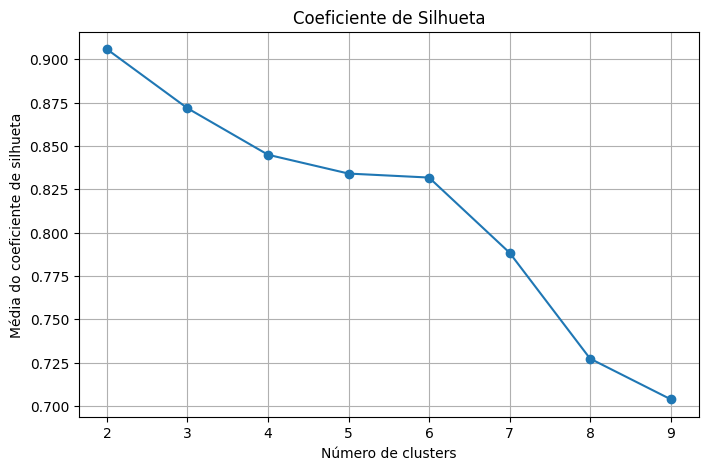

In [ ]:
#Selecionar as colunas de interesse
X = clean[['diameter', 'volume', 'surface_area']]

#Intervalo de clusters
range_n_clusters = range(2, 10)
silhouette_avg = []

#Loop para calcular o coeficiente de silhueta, para cada valor de cluster
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg.append(silhouette_score(X, cluster_labels))

#Plot do gráfico do coeficiente de silhueta
plt.figure(figsize=(8, 5))
plt.plot(range_n_clusters, silhouette_avg, marker='o')
plt.title('Coeficiente de Silhueta')
plt.xlabel('Número de clusters')
plt.ylabel('Média do coeficiente de silhueta')
plt.grid(True)
plt.show()

**Visualização dos clusters em 3D**

Com o número de clusters definido, aplicamos o K-means para agrupar os dados em 4 clusters. Posteriormente, visualizamos os resultados num gráfico 3D, que nos permitiu observar que de forma é que os nódulos se distribuem, tendo em conta as suas características, ou seja, com base no seu diâmetro, volume e área.

c:\Users\InesNeves\anaconda3\envs\Lab\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


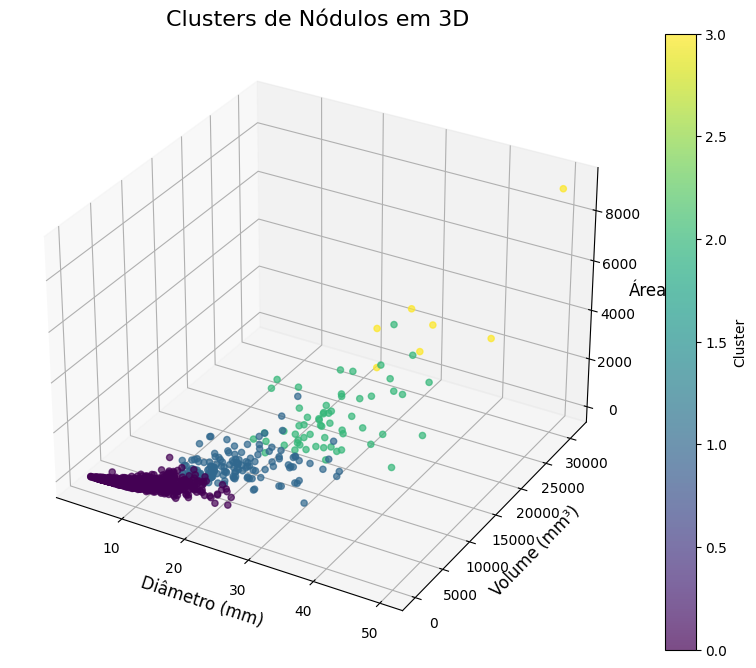

In [ ]:
clean_copy = clean.copy()

kmeans = KMeans(n_clusters=4, random_state=42)
clean_copy['cluster'] = kmeans.fit_predict(X)

#Gráfico 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

#Plot dos dados
scatter = ax.scatter(clean_copy['diameter'], clean_copy['volume'], clean_copy['surface_area'], c=clean_copy['cluster'], cmap='viridis', alpha=0.7)
ax.set_title('Clusters de Nódulos em 3D', fontsize=16)
ax.set_xlabel('Diâmetro (mm)', fontsize=12)
ax.set_ylabel('Volume (mm³)', fontsize=12)
ax.set_zlabel('Área', fontsize=12)
plt.colorbar(scatter, label='Cluster')
plt.show()

In [ ]:
#Analisar as características dos clusters
cluster_summary = clean_copy.groupby('cluster').agg({
    'diameter': ['mean', 'median', 'count', 'std', 'var'],
    'volume': ['mean', 'median','std', 'var'],
    'surface_area': ['mean', 'median','std', 'var']
}).reset_index()

#Renomear as colunas para facilitar a leitura
cluster_summary.columns = ['Cluster', 'Mean Diameter', 'Median Diameter', 'Nodules Count', 'Desvio', 'Variancia',
                           'Mean Volume', 'Median Volume', 'Desvio', 'Variancia',
                           'Mean Area', 'Median Area', 'Desvio', 'Variancia',]

cluster_summary

,Cluster,Mean Diameter,Median Diameter,Nodules Count,Desvio,Variancia,Mean Volume,Median Volume,Desvio,Variancia,Mean Area,Median Area,Desvio,Variancia
0,0,8.346043,7.411588,2001,3.403805,11.585892,201.933177,103.378296,258.195703,6.666502e+04,189.974900,123.455858,181.590253,3.297502e+04
1,1,23.475369,22.200962,152,5.359146,28.720441,2656.529571,2451.763969,938.213686,8.802449e+05,1551.863203,1400.151435,621.846692,3.866933e+05
2,2,33.967669,32.534256,59,5.630987,31.708015,7575.047919,6655.036926,2013.981644,4.056122e+06,3248.541712,2959.236714,1103.171254,1.216987e+06
3,3,40.674348,38.615703,7,7.021505,49.301531,19276.059344,18330.957955,5640.604660,3.181642e+07,5559.183063,5202.126716,1789.066449,3.200759e+06


**Transformação logarítmica das variáveis**

Com base no gráfico anterior, observamos uma função exponencial. Para ser mais fácil de analisar os resultados, procedemos a uma transformação logarítimica das variáveis e, em seguida, utilizamos o K-means para agrupar os dados transformados.

Assim, após esta transformação, o gráfico resultante mostra-nos como os nódulos são agrupados, com base nas suas características logarítmicas.

c:\Users\InesNeves\anaconda3\envs\Lab\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


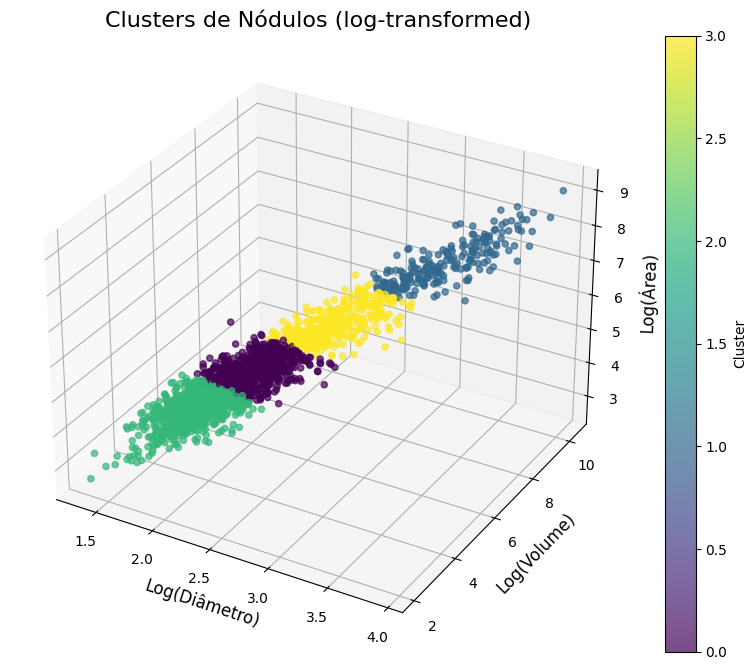

In [ ]:
#Aplica transformação logarítmica nas colunas 'diameter', 'volume' e 'surface_area'
clean_copy['log_diameter'] = np.log1p(clean_copy['diameter'])  # log1p é usado para lidar com valores próximos de 0
clean_copy['log_volume'] = np.log1p(clean_copy['volume'])
clean_copy['log_surface_area'] = np.log1p(clean_copy['surface_area'])

#Seleciona as colunas transformadas para o K-means
X_log = clean_copy[['log_diameter', 'log_volume', 'log_surface_area']]

kmeans_log = KMeans(n_clusters=4, random_state=42)

clean_copy['log_size_category'] = kmeans_log.fit_predict(X_log)

#Visualizar os clusters após a transformação logarítmica
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(clean_copy['log_diameter'], clean_copy['log_volume'], clean_copy['log_surface_area'],
                     c=clean_copy['log_size_category'], cmap='viridis', alpha=0.7)

ax.set_title('Clusters de Nódulos (log-transformed)', fontsize=16)
ax.set_xlabel('Log(Diâmetro)', fontsize=12)
ax.set_ylabel('Log(Volume)', fontsize=12)
ax.set_zlabel('Log(Área)', fontsize=12)
plt.colorbar(scatter, label='Cluster')
plt.show()


In [ ]:
clean_copy[['diameter', 'volume', 'surface_area', 'log_size_category']]

,diameter,volume,surface_area,log_size_category
0,32.205888,7869.369507,2801.428431,1
1,30.023172,6576.900681,2880.758652,1
2,31.664468,4731.410934,1996.252117,1
3,30.351544,5190.673222,1923.004803,1
4,13.353712,437.392655,315.095332,3
...,...,...,...,...
2214,29.682668,6214.691162,1955.090475,1
2215,44.662703,6000.518799,2500.239511,1
2216,21.553015,1836.158752,889.835499,1
2217,6.544805,92.315674,92.857224,0


In [ ]:
#Agrupar os dados por cluster e calcular as estatísticas de interesse
cluster_summary = clean_copy.groupby('log_size_category').agg({
    'diameter': ['mean', 'median', 'count'],  # Média, mediana e número de nódulos
    'volume': ['mean', 'median'],
    'surface_area': ['mean', 'median']
}).reset_index()

#Renomear as colunas para facilitar a leitura
cluster_summary.columns = ['Cluster', 'Mean Diameter', 'Median Diameter', 'Nodules Count',
                           'Mean Volume', 'Median Volume', 'Mean Surface Area', 'Median Surface Area']

cluster_summary

,Cluster,Mean Diameter,Median Diameter,Nodules Count,Mean Volume,Median Volume,Mean Surface Area,Median Surface Area
0,0,8.336120,8.105916,814,150.489232,137.819782,166.963865,156.938842
1,1,26.912697,25.536987,218,4517.471136,3088.058048,2144.145799,1730.212078
2,2,5.849274,5.712455,809,51.399860,51.662414,71.919213,71.579199
3,3,13.684840,13.085700,378,637.120622,507.390670,489.646061,429.542490


Conforme mencionado, para facilitar a análise e identificação dos clusters, fizemos um mapeamento dos mesmos após a transformação logarítmica para categorias numéricas.

O mapeamento é o seguinte:

- 0 -> Muito Pequeno
- 1 -> Pequeno
- 2 -> Médio
- 3 -> Grande

In [ ]:
#Mapeamento baseado nas características dos clusters
size_mapping = {
    0: '0',
    3: '1',
    1: '2',
    2: '3'
}

clean_copy['size_category'] = clean_copy['log_size_category'].map(size_mapping)

#Mostrar os primeiros resultados para verificar
clean_copy[['diameter', 'volume', 'surface_area', 'log_size_category', 'size_category']].head(10)

,diameter,volume,surface_area,log_size_category,size_category
0,32.205888,7869.369507,2801.428431,1,2
1,30.023172,6576.900681,2880.758652,1,2
2,31.664468,4731.410934,1996.252117,1,2
3,30.351544,5190.673222,1923.004803,1,2
4,13.353712,437.392655,315.095332,3,1
5,14.674187,1261.709583,624.430929,3,1
6,6.264748,115.205591,106.968885,0,0
7,8.658309,196.235361,174.794865,0,0
8,6.264748,90.951783,100.073572,0,0
9,6.987712,115.722656,118.076386,0,0


In [ ]:
clean_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2219 entries, 0 to 2218
Data columns (total 88 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   num_annotations                            2219 non-null   int64  
 1   slice_thickness                            2219 non-null   float64
 2   pixel_spacing                              2219 non-null   float64
 3   subtlety                                   2219 non-null   int64  
 4   internalStructure                          2219 non-null   int64  
 5   calcification                              2219 non-null   int64  
 6   sphericity                                 2219 non-null   int64  
 7   margin                                     2219 non-null   int64  
 8   lobulation                                 2219 non-null   int64  
 9   spiculation                                2219 non-null   int64  
 10  texture                 

In [ ]:
clean['size_category'] = clean_copy['size_category']
clean

,num_annotations,slice_thickness,pixel_spacing,subtlety,internalStructure,calcification,sphericity,margin,lobulation,spiculation,...,Mask_Width,BoundingBox_x_min,BoundingBox_x_max,BoundingBox_y_min,BoundingBox_y_max,CenterOfMass_x,CenterOfMass_y,CenterOfMassIndex_x,CenterOfMassIndex_y,size_category
0,4,2.50,0.703125,5,1,6,3,4,3,5,...,112,34,38,35,40,48.754781,56.956130,48.754781,56.956130,2
1,2,1.25,0.681641,2,1,6,5,2,1,1,...,105,35,43,35,28,51.590522,57.076549,51.590522,57.076549,2
2,1,2.50,0.820312,1,1,6,5,2,1,1,...,96,31,32,31,33,48.370429,46.268680,48.370429,46.268680,2
3,4,2.50,0.820312,5,1,6,4,3,2,2,...,100,41,34,26,29,53.110902,47.028195,53.110902,47.028195,2
4,4,2.50,0.820312,4,1,6,5,4,1,2,...,73,32,32,15,10,38.280374,36.065421,38.280374,36.065421,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2214,4,2.50,0.859375,5,4,6,5,4,1,5,...,89,32,33,29,24,46.445298,45.086372,46.445298,45.086372,2
2215,4,2.50,0.859375,5,1,6,3,4,3,1,...,94,40,37,32,26,56.611231,50.097192,56.611231,50.097192,2
2216,4,2.50,0.859375,5,1,6,4,3,4,4,...,90,32,31,19,26,40.790625,44.006250,40.790625,44.006250,2
2217,1,2.50,0.859375,1,1,6,4,2,1,1,...,69,31,32,4,6,32.550000,34.750000,32.550000,34.750000,0


In [ ]:
clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2219 entries, 0 to 2218
Data columns (total 83 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   num_annotations                            2219 non-null   int64  
 1   slice_thickness                            2219 non-null   float64
 2   pixel_spacing                              2219 non-null   float64
 3   subtlety                                   2219 non-null   int64  
 4   internalStructure                          2219 non-null   int64  
 5   calcification                              2219 non-null   int64  
 6   sphericity                                 2219 non-null   int64  
 7   margin                                     2219 non-null   int64  
 8   lobulation                                 2219 non-null   int64  
 9   spiculation                                2219 non-null   int64  
 10  texture                 

In [ ]:
clean.to_csv('cleaned_data_checkpoint2.csv', sep=',', index=False)

In [ ]:
clean= pd.read_csv('cleaned_data_checkpoint2.csv', index_col=False)
clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2219 entries, 0 to 2218
Data columns (total 83 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   num_annotations                            2219 non-null   int64  
 1   slice_thickness                            2219 non-null   float64
 2   pixel_spacing                              2219 non-null   float64
 3   subtlety                                   2219 non-null   int64  
 4   internalStructure                          2219 non-null   int64  
 5   calcification                              2219 non-null   int64  
 6   sphericity                                 2219 non-null   int64  
 7   margin                                     2219 non-null   int64  
 8   lobulation                                 2219 non-null   int64  
 9   spiculation                                2219 non-null   int64  
 10  texture                 

De seguida, repetimos o processo anterior, no entanto, desta vez aplicando nas colunas *margin*, *lobulation* e *spiculation*. Ou seja, mapeamos os nódulos considerando a complexidade dos mesmos. Assim, definimos 0 como pouco complexo, 1 como complexidade média e 2 como muito complexo.

Neste caso, para determinarmos o número ideal de clusters recorremos ao Elbow Method. Este método tem por base a soma das distâncias quadráticas internas, para medir a qualidade dos clusters.

Analisando o gráfico, o número ideal de clusters escolhido foi 3.

c:\Users\InesNeves\anaconda3\envs\Lab\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\InesNeves\anaconda3\envs\Lab\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\InesNeves\anaconda3\envs\Lab\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\InesNeves\anaconda3\envs\Lab\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` wi

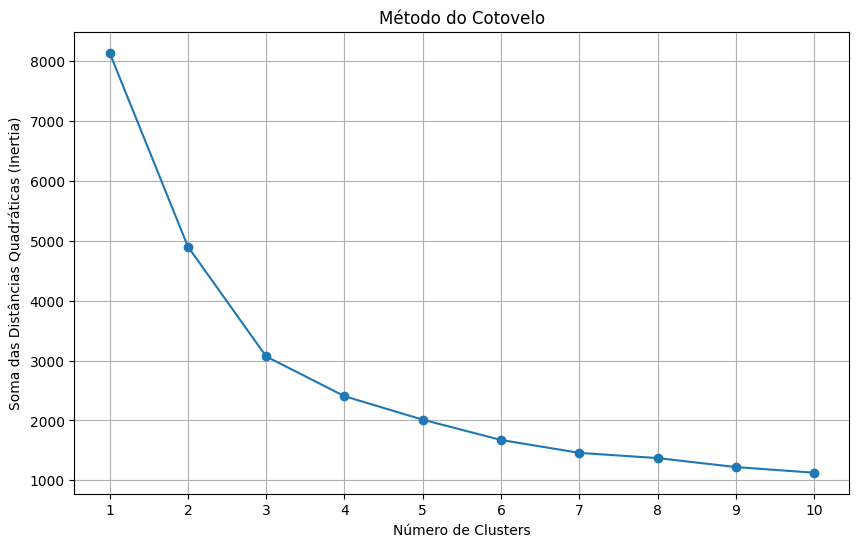

In [ ]:
#Seleciona as colunas de interesse
X = clean[['margin', 'lobulation','spiculation']]

#Lista para armazenar a soma das distâncias quadráticas (inertia)
inertia = []

#Testar diferentes números de clusters
range_n_clusters = range(1, 11)

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

#Plot do gráfico pelo método do cotovelo
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, inertia, marker='o')
plt.title('Método do Cotovelo')
plt.xlabel('Número de Clusters')
plt.ylabel('Soma das Distâncias Quadráticas (Inertia)')
plt.xticks(range_n_clusters)
plt.grid()
plt.show()

**Visualização dos clusters em 3D**

c:\Users\InesNeves\anaconda3\envs\Lab\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


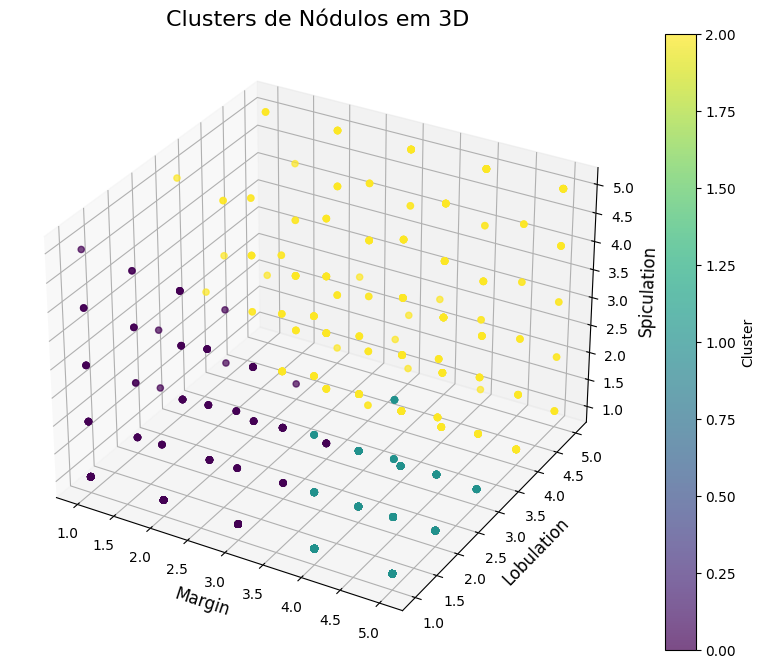

In [ ]:
clean_copy = clean.copy()

kmeans = KMeans(n_clusters=3, random_state=42)
clean_copy['cluster'] = kmeans.fit_predict(X)

# Gráfico 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

#Plot dos dados
scatter = ax.scatter(clean_copy['margin'], clean_copy['lobulation'], clean_copy['spiculation'], c=clean_copy['cluster'], cmap='viridis', alpha=0.7)
ax.set_title('Clusters de Nódulos em 3D', fontsize=16)
ax.set_xlabel('Margin', fontsize=12)
ax.set_ylabel('Lobulation', fontsize=12)
ax.set_zlabel('Spiculation', fontsize=12)
plt.colorbar(scatter, label='Cluster')
plt.show()

In [ ]:
#Analisar as características dos clusters
cluster_summary = clean_copy.groupby('cluster').agg({
    'margin': ['count', 'median', 'std', 'var'],
    'lobulation': ['median','std', 'var'],
    'spiculation': [ 'median','std', 'var']
}).reset_index()

#Renomear as colunas para facilitar a leitura
cluster_summary.columns = ['Cluster',  'Nodules Count', 'Median  Margin','Desvio', 'Variancia',
                            'Median Lobulation', 'Desvio', 'Variancia',
                            'Median Spiculation', 'Desvio', 'Variancia',]

cluster_summary

,Cluster,Nodules Count,Median Margin,Desvio,Variancia,Median Lobulation,Desvio,Variancia,Median Spiculation,Desvio,Variancia
0,0,368,2.0,0.797312,0.635707,1.0,0.756204,0.571844,1.0,0.718863,0.516763
1,1,1468,5.0,0.452414,0.204679,1.0,0.527197,0.277937,1.0,0.406930,0.165592
2,2,383,4.0,0.985389,0.970992,4.0,1.110875,1.234044,3.0,1.295763,1.679002


Mapeamento dos clusters para as categorias de complexidade:
- 0 -> Pouco Complexo
- 1 -> Complexidade Média
- 2 -> Muito Complexo

In [ ]:
#Mapeamento baseado nas características dos clusters
size_mapping = {
    2: '0',
    1: '1',
    0: '2',
}

clean_copy['complexity_category'] = clean_copy['cluster'].map(size_mapping)

#Mostrar os primeiros resultados para verificar
clean_copy[['margin', 'lobulation','spiculation', 'cluster', 'complexity_category']].head()

,margin,lobulation,spiculation,cluster,complexity_category
0,4,3,5,2,0
1,2,1,1,0,2
2,2,1,1,0,2
3,3,2,2,0,2
4,4,1,2,1,1


In [ ]:
clean['complexity_category'] = clean_copy['complexity_category']
clean

,num_annotations,slice_thickness,pixel_spacing,subtlety,internalStructure,calcification,sphericity,margin,lobulation,spiculation,...,BoundingBox_x_min,BoundingBox_x_max,BoundingBox_y_min,BoundingBox_y_max,CenterOfMass_x,CenterOfMass_y,CenterOfMassIndex_x,CenterOfMassIndex_y,size_category,complexity_category
0,4,2.50,0.703125,5,1,6,3,4,3,5,...,34,38,35,40,48.754781,56.956130,48.754781,56.956130,2,0
1,2,1.25,0.681641,2,1,6,5,2,1,1,...,35,43,35,28,51.590522,57.076549,51.590522,57.076549,2,2
2,1,2.50,0.820312,1,1,6,5,2,1,1,...,31,32,31,33,48.370429,46.268680,48.370429,46.268680,2,2
3,4,2.50,0.820312,5,1,6,4,3,2,2,...,41,34,26,29,53.110902,47.028195,53.110902,47.028195,2,2
4,4,2.50,0.820312,4,1,6,5,4,1,2,...,32,32,15,10,38.280374,36.065421,38.280374,36.065421,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2214,4,2.50,0.859375,5,4,6,5,4,1,5,...,32,33,29,24,46.445298,45.086372,46.445298,45.086372,2,0
2215,4,2.50,0.859375,5,1,6,3,4,3,1,...,40,37,32,26,56.611231,50.097192,56.611231,50.097192,2,1
2216,4,2.50,0.859375,5,1,6,4,3,4,4,...,32,31,19,26,40.790625,44.006250,40.790625,44.006250,2,0
2217,1,2.50,0.859375,1,1,6,4,2,1,1,...,31,32,4,6,32.550000,34.750000,32.550000,34.750000,0,2


In [ ]:
clean.to_csv('checkpoint4.csv', sep=',', index=False)
clean

,num_annotations,slice_thickness,pixel_spacing,subtlety,internalStructure,calcification,sphericity,margin,lobulation,spiculation,...,BoundingBox_x_min,BoundingBox_x_max,BoundingBox_y_min,BoundingBox_y_max,CenterOfMass_x,CenterOfMass_y,CenterOfMassIndex_x,CenterOfMassIndex_y,size_category,complexity_category
0,4,2.50,0.703125,5,1,6,3,4,3,5,...,34,38,35,40,48.754781,56.956130,48.754781,56.956130,2,0
1,2,1.25,0.681641,2,1,6,5,2,1,1,...,35,43,35,28,51.590522,57.076549,51.590522,57.076549,2,2
2,1,2.50,0.820312,1,1,6,5,2,1,1,...,31,32,31,33,48.370429,46.268680,48.370429,46.268680,2,2
3,4,2.50,0.820312,5,1,6,4,3,2,2,...,41,34,26,29,53.110902,47.028195,53.110902,47.028195,2,2
4,4,2.50,0.820312,4,1,6,5,4,1,2,...,32,32,15,10,38.280374,36.065421,38.280374,36.065421,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2214,4,2.50,0.859375,5,4,6,5,4,1,5,...,32,33,29,24,46.445298,45.086372,46.445298,45.086372,2,0
2215,4,2.50,0.859375,5,1,6,3,4,3,1,...,40,37,32,26,56.611231,50.097192,56.611231,50.097192,2,1
2216,4,2.50,0.859375,5,1,6,4,3,4,4,...,32,31,19,26,40.790625,44.006250,40.790625,44.006250,2,0
2217,1,2.50,0.859375,1,1,6,4,2,1,1,...,31,32,4,6,32.550000,34.750000,32.550000,34.750000,0,2


In [ ]:
df = pd.read_csv('checkpoint4.csv', index_col=False)
df.head(5)

,num_annotations,slice_thickness,pixel_spacing,subtlety,internalStructure,calcification,sphericity,margin,lobulation,spiculation,...,BoundingBox_x_min,BoundingBox_x_max,BoundingBox_y_min,BoundingBox_y_max,CenterOfMass_x,CenterOfMass_y,CenterOfMassIndex_x,CenterOfMassIndex_y,size_category,complexity_category
0,4,2.50,0.703125,5,1,6,3,4,3,5,...,34,38,35,40,48.754781,56.956130,48.754781,56.956130,2,0
1,2,1.25,0.681641,2,1,6,5,2,1,1,...,35,43,35,28,51.590522,57.076549,51.590522,57.076549,2,2
2,1,2.50,0.820312,1,1,6,5,2,1,1,...,31,32,31,33,48.370429,46.268680,48.370429,46.268680,2,2
3,4,2.50,0.820312,5,1,6,4,3,2,2,...,41,34,26,29,53.110902,47.028195,53.110902,47.028195,2,2
4,4,2.50,0.820312,4,1,6,5,4,1,2,...,32,32,15,10,38.280374,36.065421,38.280374,36.065421,1,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2219 entries, 0 to 2218
Data columns (total 84 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   num_annotations                            2219 non-null   int64  
 1   slice_thickness                            2219 non-null   float64
 2   pixel_spacing                              2219 non-null   float64
 3   subtlety                                   2219 non-null   int64  
 4   internalStructure                          2219 non-null   int64  
 5   calcification                              2219 non-null   int64  
 6   sphericity                                 2219 non-null   int64  
 7   margin                                     2219 non-null   int64  
 8   lobulation                                 2219 non-null   int64  
 9   spiculation                                2219 non-null   int64  
 10  texture                 

**Harmonização dos dados radiomicos recorrendo ao ComBat**

In [ ]:
#Transformação da coluna Manufacturer num array de valores
batch = df['Manufacturer']
batch = batch.values

**Seleção de colunas para harmonização**

Para podermos harmonizar os nossos dados, selecionamos algumas colunas específicas do dataset e criamos um subconjunto focado em algumas características de interesse, fornecendo uma base consistente para a harmonização.

Estas colunas incluem diversas métricas estatísticas, métricas de textura e estrutura relacionadas com as imagens e máscaras dos nódulos, assim como as suas características geométricas.  

In [ ]:
to_harmonize =['Image-original_Mean', 'Image-original_Maximum',
                  'Mask-original_VoxelNum','Mask-original_VolumeNum',
                  '10Percentile', '90Percentile', 'Energy','InterquartileRange', 'Kurtosis',
                  'Maximum', 'MeanAbsoluteDeviation','Mean', 'Median', 'Minimum', 'Range',
                  'RobustMeanAbsoluteDeviation','RootMeanSquared', 'Skewness', 'TotalEnergy', 'Variance',
                  'gldm_DependenceEntropy', 'gldm_DependenceNonUniformity','gldm_DependenceNonUniformityNormalized',
                  'gldm_DependenceVariance','gldm_GrayLevelNonUniformity', 'gldm_LargeDependenceEmphasis',
                  'gldm_LargeDependenceHighGrayLevelEmphasis','gldm_LargeDependenceLowGrayLevelEmphasis',
                  'gldm_SmallDependenceEmphasis','gldm_SmallDependenceHighGrayLevelEmphasis',
                  'gldm_SmallDependenceLowGrayLevelEmphasis',
                  'glrlm_GrayLevelNonUniformity','glrlm_LongRunEmphasis', 'glrlm_LongRunHighGrayLevelEmphasis',
                  'glrlm_LongRunLowGrayLevelEmphasis', 'glrlm_RunEntropy','glrlm_RunLengthNonUniformity',
                  'glrlm_RunLengthNonUniformityNormalized','glrlm_RunPercentage', 'glrlm_RunVariance',
                  'glrlm_ShortRunEmphasis','glrlm_ShortRunHighGrayLevelEmphasis', 'glrlm_ShortRunLowGrayLevelEmphasis',
                  'glszm_GrayLevelNonUniformity', 'glszm_LargeAreaEmphasis',
                  'glszm_LargeAreaHighGrayLevelEmphasis', 'glszm_LargeAreaLowGrayLevelEmphasis',
                  'glszm_SizeZoneNonUniformityNormalized', 'glszm_SmallAreaEmphasis',
                  'glszm_SmallAreaHighGrayLevelEmphasis', 'glszm_SmallAreaLowGrayLevelEmphasis',
                  'glszm_ZoneEntropy', 'glszm_ZonePercentage', 'glszm_ZoneVariance',
                  'Image_Height', 'Image_Width', 'Mask_Height', 'Mask_Width','BoundingBox_x_min', 'BoundingBox_x_max', 'BoundingBox_y_min',
                  'BoundingBox_y_max', 'CenterOfMass_x', 'CenterOfMass_y','CenterOfMassIndex_x', 'CenterOfMassIndex_y']

df_to_harmonize = df[to_harmonize]

**Identificação e remoção de colunas com variância baixa ou nula**

Para garantir que o dataset tem apenas features informativas, fizemos uma análise da variância para eliminar colunas que não contribuam, de forma significativa, para a análise.

Uma variância baixa ou nula indica que os valores de uma coluna são muito semelhantes, logo limita a capacidade de diferenciação de amostras, correndo o risco de introduzir ruído nos modelos de avaliação.

In [ ]:
#Identificar as colunas com variância igual a 0, que não contribuem para a variabilidade dos dados
zero_variance_features = df_to_harmonize.loc[:, (df_to_harmonize.var() == 0)].columns

zero_variance_features

Index([], dtype='object')

In [ ]:
#Identificar as colunas com baixa variância
low_variance_features = df_to_harmonize.loc[:, (df_to_harmonize.var() < 0.0085)].columns

low_variance_features

Index(['Image-original_Mean', 'Mask-original_VolumeNum', 'InterquartileRange',
       'MeanAbsoluteDeviation', 'RobustMeanAbsoluteDeviation', 'Variance',
       'gldm_SmallDependenceEmphasis',
       'gldm_SmallDependenceHighGrayLevelEmphasis',
       'gldm_SmallDependenceLowGrayLevelEmphasis', 'glrlm_RunPercentage',
       'glrlm_ShortRunEmphasis', 'glrlm_ShortRunHighGrayLevelEmphasis',
       'glrlm_ShortRunLowGrayLevelEmphasis', 'glszm_GrayLevelNonUniformity',
       'glszm_SizeZoneNonUniformityNormalized', 'glszm_SmallAreaEmphasis',
       'glszm_SmallAreaHighGrayLevelEmphasis',
       'glszm_SmallAreaLowGrayLevelEmphasis', 'glszm_ZoneEntropy',
       'glszm_ZonePercentage'],
      dtype='object')

In [ ]:
#Remover as colunas com variância baixa ou nula
df_to_harmonize= df_to_harmonize.drop(columns=low_variance_features)


Após a filtragem da variância, harmonizamos os dados, recorrendo ao Combat.

Este processo, é importante pois permite comparações precisas, evitando conclusões enviesadas em análises que envolvem dados extraídos de diferentes condições.

A harmonização dos dados extraídos foi feita tendo por base a seguinte referência:

https://aapm.onlinelibrary.wiley.com/doi/10.1002/mp.14948

In [ ]:
combat_instance = Combat()
combat_instance.fit(df_to_harmonize.values, batch)
harmonized_data = combat_instance.transform(df_to_harmonize.values, batch)

harmonized_data

array([[6.90949504e-01, 9.07837456e+02, 4.79836434e-01, ...,
        5.68439145e+01, 4.90520271e+01, 5.68439145e+01],
       [6.43152797e-01, 8.40380619e+02, 2.19733216e-01, ...,
        5.69633612e+01, 5.19483419e+01, 5.69633612e+01],
       [5.68470442e-01, 6.42098398e+02, 1.94696543e-01, ...,
        4.62427370e+01, 4.86594658e+01, 4.62427370e+01],
       ...,
       [6.70038445e-01, 3.26277749e+02, 4.32246884e-01, ...,
        4.39985696e+01, 4.09177528e+01, 4.39985696e+01],
       [3.37453025e-01, 1.96557589e+01, 2.44024750e-01, ...,
        3.48170390e+01, 3.25011036e+01, 3.48170390e+01],
       [5.44572089e-01, 6.76932040e+01, 3.17495465e-01, ...,
        3.80852187e+01, 3.45308671e+01, 3.80852187e+01]])

In [ ]:
#Conversão dos dados harmonizados para DataFrame
har_df = pd.DataFrame(harmonized_data, columns=df_to_harmonize.columns)

In [ ]:
har_df

,Image-original_Maximum,Mask-original_VoxelNum,10Percentile,90Percentile,Energy,Kurtosis,Maximum,Mean,Median,Minimum,...,Mask_Height,Mask_Width,BoundingBox_x_min,BoundingBox_x_max,BoundingBox_y_min,BoundingBox_y_max,CenterOfMass_x,CenterOfMass_y,CenterOfMassIndex_x,CenterOfMassIndex_y
0,0.690950,907.837456,0.479836,0.670383,346.359908,5.590512,0.690950,0.608686,0.642324,0.283025,...,104.880868,111.444410,34.093927,37.887096,35.490702,40.227694,49.052027,56.843915,49.052027,56.843915
1,0.643153,840.380619,0.219733,0.338995,67.023665,9.154172,0.643153,0.278820,0.270567,0.150884,...,111.041942,104.569260,35.140870,42.773617,35.490702,28.168506,51.948342,56.963361,51.948342,56.963361
2,0.568470,642.098398,0.194697,0.346731,47.936054,3.867739,0.568470,0.268788,0.261061,0.159726,...,94.612411,95.729781,30.953099,32.023272,31.423056,33.193168,48.659466,46.242737,48.659466,46.242737
3,0.702899,542.957288,0.372238,0.622772,164.311671,2.931869,0.702899,0.538663,0.584784,0.241270,...,105.907714,99.658438,41.422525,33.977880,26.338497,29.173438,53.501198,46.996121,53.501198,46.996121
4,0.608799,108.576136,0.329815,0.596190,25.941565,1.996060,0.608799,0.477194,0.503228,0.235376,...,79.209727,73.140000,32.000042,32.023272,15.152468,10.079724,38.353881,36.121841,38.353881,36.121841
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2214,0.667549,531.714482,0.111837,0.561771,66.588205,1.711078,0.667549,0.310682,0.276572,0.098814,...,94.612411,88.854630,32.000042,33.000576,29.389232,24.148777,46.693212,45.069973,46.693212,45.069973
2215,0.666553,472.434231,0.414960,0.641618,156.162576,3.856843,0.666553,0.564882,0.605798,0.252569,...,114.122479,93.765452,40.375582,36.909792,32.439967,26.158641,57.076296,50.040344,57.076296,50.040344
2216,0.670038,326.277749,0.432247,0.642659,112.136964,3.876055,0.670038,0.577623,0.611803,0.316920,...,86.397646,89.836794,32.000042,31.045967,19.220115,26.158641,40.917753,43.998570,40.917753,43.998570
2217,0.337453,19.655759,0.244025,0.333639,1.310106,1.771313,0.337453,0.286965,0.282826,0.240288,...,68.941270,69.211343,30.953099,32.023272,3.966439,6.059994,32.501104,34.817039,32.501104,34.817039


In [ ]:
#Adição do prefixo "harmonized_" nas colunas já harmonizadas
prefix = 'harmonized_'
har_df = har_df.add_prefix(prefix)
har_df

,harmonized_Image-original_Maximum,harmonized_Mask-original_VoxelNum,harmonized_10Percentile,harmonized_90Percentile,harmonized_Energy,harmonized_Kurtosis,harmonized_Maximum,harmonized_Mean,harmonized_Median,harmonized_Minimum,...,harmonized_Mask_Height,harmonized_Mask_Width,harmonized_BoundingBox_x_min,harmonized_BoundingBox_x_max,harmonized_BoundingBox_y_min,harmonized_BoundingBox_y_max,harmonized_CenterOfMass_x,harmonized_CenterOfMass_y,harmonized_CenterOfMassIndex_x,harmonized_CenterOfMassIndex_y
0,0.690950,907.837456,0.479836,0.670383,346.359908,5.590512,0.690950,0.608686,0.642324,0.283025,...,104.880868,111.444410,34.093927,37.887096,35.490702,40.227694,49.052027,56.843915,49.052027,56.843915
1,0.643153,840.380619,0.219733,0.338995,67.023665,9.154172,0.643153,0.278820,0.270567,0.150884,...,111.041942,104.569260,35.140870,42.773617,35.490702,28.168506,51.948342,56.963361,51.948342,56.963361
2,0.568470,642.098398,0.194697,0.346731,47.936054,3.867739,0.568470,0.268788,0.261061,0.159726,...,94.612411,95.729781,30.953099,32.023272,31.423056,33.193168,48.659466,46.242737,48.659466,46.242737
3,0.702899,542.957288,0.372238,0.622772,164.311671,2.931869,0.702899,0.538663,0.584784,0.241270,...,105.907714,99.658438,41.422525,33.977880,26.338497,29.173438,53.501198,46.996121,53.501198,46.996121
4,0.608799,108.576136,0.329815,0.596190,25.941565,1.996060,0.608799,0.477194,0.503228,0.235376,...,79.209727,73.140000,32.000042,32.023272,15.152468,10.079724,38.353881,36.121841,38.353881,36.121841
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2214,0.667549,531.714482,0.111837,0.561771,66.588205,1.711078,0.667549,0.310682,0.276572,0.098814,...,94.612411,88.854630,32.000042,33.000576,29.389232,24.148777,46.693212,45.069973,46.693212,45.069973
2215,0.666553,472.434231,0.414960,0.641618,156.162576,3.856843,0.666553,0.564882,0.605798,0.252569,...,114.122479,93.765452,40.375582,36.909792,32.439967,26.158641,57.076296,50.040344,57.076296,50.040344
2216,0.670038,326.277749,0.432247,0.642659,112.136964,3.876055,0.670038,0.577623,0.611803,0.316920,...,86.397646,89.836794,32.000042,31.045967,19.220115,26.158641,40.917753,43.998570,40.917753,43.998570
2217,0.337453,19.655759,0.244025,0.333639,1.310106,1.771313,0.337453,0.286965,0.282826,0.240288,...,68.941270,69.211343,30.953099,32.023272,3.966439,6.059994,32.501104,34.817039,32.501104,34.817039


In [ ]:
har_df.to_csv('harmonized_features.csv', sep=',', index=False)

Juntámos, em colunas, o DataFrame original com o DataFrame que contem as colunas harmonizadas.

In [ ]:
df_comb = pd.concat([df, har_df], axis=1)

Renomeamos algumas da colunas harmonizadas, para criar um novo DataFrame.

In [ ]:
selected_h= ['harmonized_Image-original_Maximum','harmonized_Mask-original_VoxelNum','harmonized_10Percentile','harmonized_90Percentile',
'harmonized_Energy','harmonized_Kurtosis','harmonized_Maximum','harmonized_Mean','harmonized_Median','harmonized_Minimum',
'harmonized_Range','harmonized_RootMeanSquared','harmonized_Skewness','harmonized_TotalEnergy','harmonized_gldm_DependenceEntropy',
'harmonized_gldm_DependenceNonUniformity','harmonized_gldm_DependenceNonUniformityNormalized','harmonized_gldm_DependenceVariance',
'harmonized_gldm_GrayLevelNonUniformity','harmonized_gldm_LargeDependenceEmphasis','harmonized_gldm_LargeDependenceHighGrayLevelEmphasis',
'harmonized_gldm_LargeDependenceLowGrayLevelEmphasis','harmonized_glrlm_GrayLevelNonUniformity','harmonized_glrlm_LongRunEmphasis',
'harmonized_glrlm_LongRunHighGrayLevelEmphasis','harmonized_glrlm_LongRunLowGrayLevelEmphasis','harmonized_glrlm_RunEntropy',
'harmonized_glrlm_RunLengthNonUniformity','harmonized_glrlm_RunLengthNonUniformityNormalized','harmonized_glrlm_RunVariance',
'harmonized_glszm_LargeAreaEmphasis','harmonized_glszm_LargeAreaHighGrayLevelEmphasis','harmonized_glszm_LargeAreaLowGrayLevelEmphasis',
'harmonized_glszm_ZoneVariance','harmonized_Image_Height','harmonized_Image_Width','harmonized_Mask_Height','harmonized_Mask_Width',
'harmonized_BoundingBox_x_min','harmonized_BoundingBox_x_max','harmonized_BoundingBox_y_min','harmonized_BoundingBox_y_max','harmonized_CenterOfMass_x',
'harmonized_CenterOfMass_y','harmonized_CenterOfMassIndex_x','harmonized_CenterOfMassIndex_y']

df_sel_har = df_comb.loc[:, selected_h]

df_sel_har.columns = df_sel_har.columns.str.replace('harmonized_', '', regex=False)

df_sel_har

,Image-original_Maximum,Mask-original_VoxelNum,10Percentile,90Percentile,Energy,Kurtosis,Maximum,Mean,Median,Minimum,...,Mask_Height,Mask_Width,BoundingBox_x_min,BoundingBox_x_max,BoundingBox_y_min,BoundingBox_y_max,CenterOfMass_x,CenterOfMass_y,CenterOfMassIndex_x,CenterOfMassIndex_y
0,0.690950,907.837456,0.479836,0.670383,346.359908,5.590512,0.690950,0.608686,0.642324,0.283025,...,104.880868,111.444410,34.093927,37.887096,35.490702,40.227694,49.052027,56.843915,49.052027,56.843915
1,0.643153,840.380619,0.219733,0.338995,67.023665,9.154172,0.643153,0.278820,0.270567,0.150884,...,111.041942,104.569260,35.140870,42.773617,35.490702,28.168506,51.948342,56.963361,51.948342,56.963361
2,0.568470,642.098398,0.194697,0.346731,47.936054,3.867739,0.568470,0.268788,0.261061,0.159726,...,94.612411,95.729781,30.953099,32.023272,31.423056,33.193168,48.659466,46.242737,48.659466,46.242737
3,0.702899,542.957288,0.372238,0.622772,164.311671,2.931869,0.702899,0.538663,0.584784,0.241270,...,105.907714,99.658438,41.422525,33.977880,26.338497,29.173438,53.501198,46.996121,53.501198,46.996121
4,0.608799,108.576136,0.329815,0.596190,25.941565,1.996060,0.608799,0.477194,0.503228,0.235376,...,79.209727,73.140000,32.000042,32.023272,15.152468,10.079724,38.353881,36.121841,38.353881,36.121841
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2214,0.667549,531.714482,0.111837,0.561771,66.588205,1.711078,0.667549,0.310682,0.276572,0.098814,...,94.612411,88.854630,32.000042,33.000576,29.389232,24.148777,46.693212,45.069973,46.693212,45.069973
2215,0.666553,472.434231,0.414960,0.641618,156.162576,3.856843,0.666553,0.564882,0.605798,0.252569,...,114.122479,93.765452,40.375582,36.909792,32.439967,26.158641,57.076296,50.040344,57.076296,50.040344
2216,0.670038,326.277749,0.432247,0.642659,112.136964,3.876055,0.670038,0.577623,0.611803,0.316920,...,86.397646,89.836794,32.000042,31.045967,19.220115,26.158641,40.917753,43.998570,40.917753,43.998570
2217,0.337453,19.655759,0.244025,0.333639,1.310106,1.771313,0.337453,0.286965,0.282826,0.240288,...,68.941270,69.211343,30.953099,32.023272,3.966439,6.059994,32.501104,34.817039,32.501104,34.817039


Selacionamos um conjunto específico de colunas do DataFrame e amazenámo-las no novo DataFrame.

In [ ]:
selected= ['Image-original_Maximum','Mask-original_VoxelNum','10Percentile','90Percentile',
'Energy','Kurtosis','Maximum','Mean','Median','Minimum',
'Range','RootMeanSquared','Skewness','TotalEnergy','gldm_DependenceEntropy',
'gldm_DependenceNonUniformity','gldm_DependenceNonUniformityNormalized','gldm_DependenceVariance',
'gldm_GrayLevelNonUniformity','gldm_LargeDependenceEmphasis','gldm_LargeDependenceHighGrayLevelEmphasis',
'gldm_LargeDependenceLowGrayLevelEmphasis','glrlm_GrayLevelNonUniformity','glrlm_LongRunEmphasis',
'glrlm_LongRunHighGrayLevelEmphasis','glrlm_LongRunLowGrayLevelEmphasis','glrlm_RunEntropy',
'glrlm_RunLengthNonUniformity','glrlm_RunLengthNonUniformityNormalized','glrlm_RunVariance',
'glszm_LargeAreaEmphasis','glszm_LargeAreaHighGrayLevelEmphasis','glszm_LargeAreaLowGrayLevelEmphasis',
'glszm_ZoneVariance','Image_Height','Image_Width','Mask_Height','Mask_Width',
'BoundingBox_x_min','BoundingBox_x_max','BoundingBox_y_min','BoundingBox_y_max','CenterOfMass_x',
'CenterOfMass_y','CenterOfMassIndex_x','CenterOfMassIndex_y']

df_sel = df_comb.loc[:, selected]
df_sel

,Image-original_Maximum,Mask-original_VoxelNum,10Percentile,90Percentile,Energy,Kurtosis,Maximum,Mean,Median,Minimum,...,Mask_Height,Mask_Width,BoundingBox_x_min,BoundingBox_x_max,BoundingBox_y_min,BoundingBox_y_max,CenterOfMass_x,CenterOfMass_y,CenterOfMassIndex_x,CenterOfMassIndex_y
0,0.6900,889,0.47840,0.66850,333.147336,5.463326,0.6900,0.606997,0.63950,0.2800,...,104,112,34,38,35,40,48.754781,56.956130,48.754781,56.956130
1,0.6420,823,0.21660,0.33440,64.761918,8.875374,0.6420,0.275078,0.26800,0.1455,...,110,105,35,43,35,28,51.590522,57.076549,51.590522,57.076549
2,0.5670,629,0.19140,0.34220,46.422599,3.813847,0.5670,0.264985,0.25850,0.1545,...,94,96,31,32,31,33,48.370429,46.268680,48.370429,46.268680
3,0.7020,532,0.37010,0.62050,158.235941,2.917793,0.7020,0.536539,0.58200,0.2375,...,105,100,41,34,26,29,53.110902,47.028195,53.110902,47.028195
4,0.6075,107,0.32740,0.59370,25.290361,2.021797,0.6075,0.474687,0.50050,0.2315,...,79,73,32,32,15,10,38.280374,36.065421,38.280374,36.065421
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2214,0.6665,521,0.10800,0.55900,64.343529,1.748939,0.6665,0.307139,0.27400,0.0925,...,94,89,32,33,29,24,46.445298,45.086372,46.445298,45.086372
2215,0.6655,463,0.41310,0.63950,150.406315,3.803415,0.6655,0.562920,0.60300,0.2490,...,113,94,40,37,32,26,56.611231,50.097192,56.611231,50.097192
2216,0.6690,320,0.43050,0.64055,108.106640,3.821810,0.6690,0.575741,0.60900,0.3145,...,86,90,32,31,19,26,40.790625,44.006250,40.790625,44.006250
2217,0.3350,20,0.24105,0.32900,1.624530,1.806612,0.3350,0.283275,0.28025,0.2365,...,69,69,31,32,4,6,32.550000,34.750000,32.550000,34.750000


Calculamos a variância das features harmonizadas e não harmonizadas, para podermos comparar a variabilidade das features antes e após a harmonização.

In [ ]:
var_har = df_sel_har.var()
var = df_sel.var()

In [ ]:
var_compare = pd.DataFrame({
    'Harmonizadas': var_har,
    'Não Harmonizadas': var
})

var_compare

,Harmonizadas,Não Harmonizadas
Image-original_Maximum,2.996403e-02,2.989715e-02
Mask-original_VoxelNum,2.949457e+04,2.961333e+04
10Percentile,1.145879e-02,1.156831e-02
90Percentile,3.015389e-02,3.010878e-02
Energy,3.410157e+03,3.441358e+03
Kurtosis,4.267015e+00,4.528444e+00
Maximum,2.996403e-02,2.989715e-02
Mean,1.921525e-02,1.925591e-02
Median,2.366844e-02,2.377158e-02
Minimum,9.612524e-03,9.715105e-03


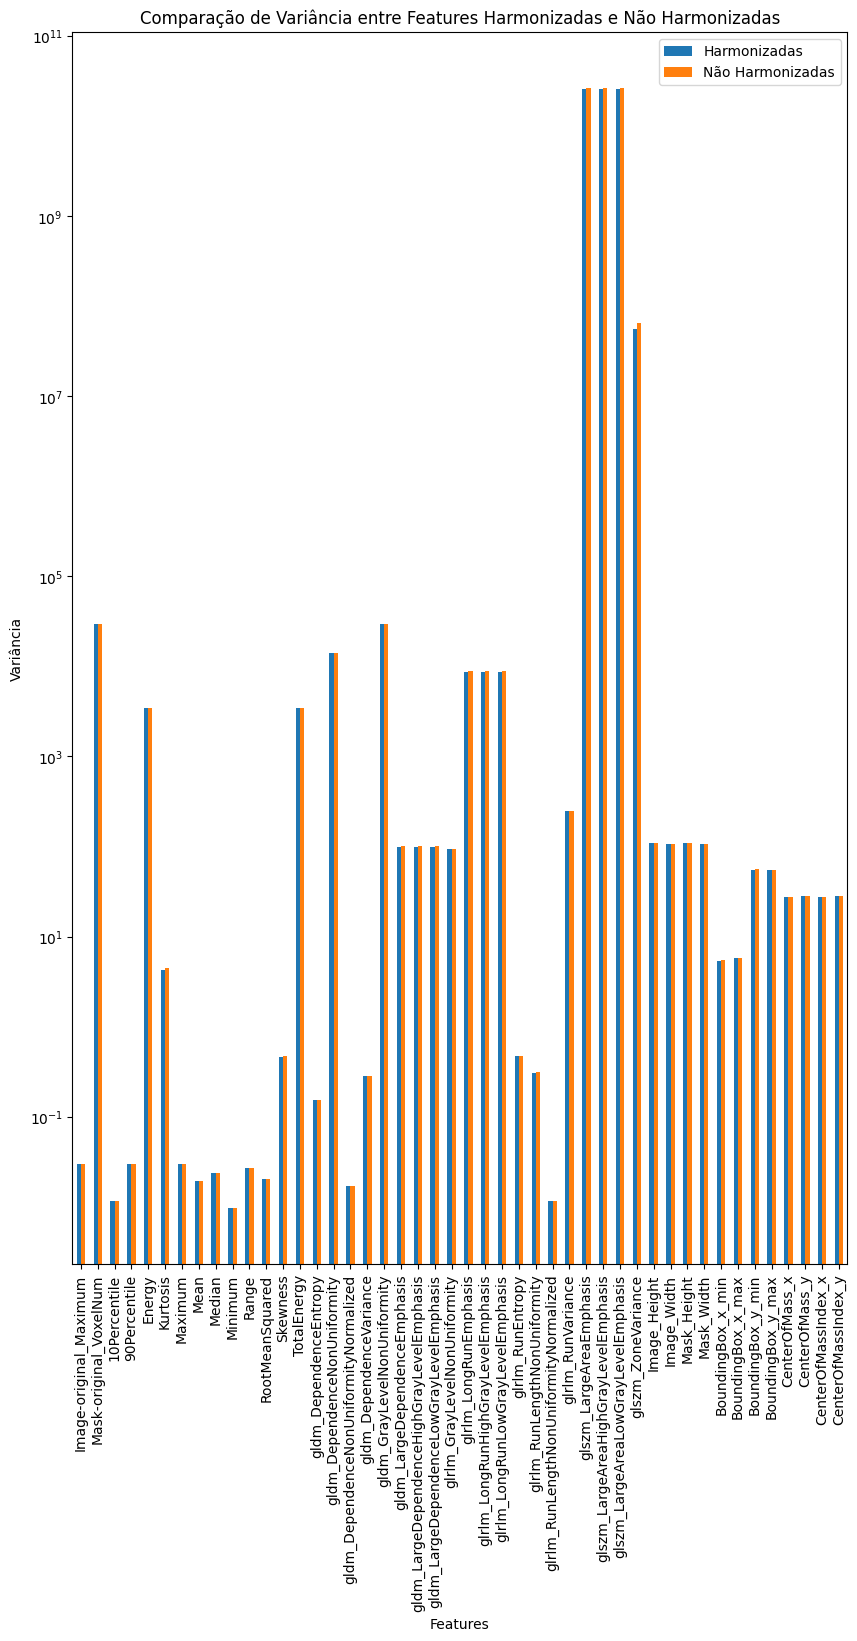

In [ ]:
#Gráfico para visualizar e comparar as variânias das features harmonizadas e não harmonizadas
var_compare.plot(kind='bar', figsize=(10, 16))
plt.title('Comparação de Variância entre Features Harmonizadas e Não Harmonizadas')
plt.ylabel('Variância')
plt.xlabel('Features')
plt.xticks(rotation=90)
plt.yscale('log')
plt.legend(loc='upper right')
plt.show()

Uma vez que a variancia das features harmonizadas é comparável à das não harmonizadas, indica que não houve perda de informações importantes, durante a harmonização.

In [ ]:
#Dataset Harmonizado
dataset_harmonized = df_comb.drop(columns=['Image-original_Maximum','Mask-original_VoxelNum','10Percentile','90Percentile',
'Energy','Kurtosis','Maximum','Mean','Median','Minimum',
'Range','RootMeanSquared','Skewness','TotalEnergy','gldm_DependenceEntropy',
'gldm_DependenceNonUniformity','gldm_DependenceNonUniformityNormalized','gldm_DependenceVariance',
'gldm_GrayLevelNonUniformity','gldm_LargeDependenceEmphasis','gldm_LargeDependenceHighGrayLevelEmphasis',
'gldm_LargeDependenceLowGrayLevelEmphasis','glrlm_GrayLevelNonUniformity','glrlm_LongRunEmphasis',
'glrlm_LongRunHighGrayLevelEmphasis','glrlm_LongRunLowGrayLevelEmphasis','glrlm_RunEntropy',
'glrlm_RunLengthNonUniformity','glrlm_RunLengthNonUniformityNormalized','glrlm_RunVariance',
'glszm_LargeAreaEmphasis','glszm_LargeAreaHighGrayLevelEmphasis','glszm_LargeAreaLowGrayLevelEmphasis',
'glszm_ZoneVariance','Image_Height','Image_Width','Mask_Height','Mask_Width',
'BoundingBox_x_min','BoundingBox_x_max','BoundingBox_y_min','BoundingBox_y_max','CenterOfMass_x',
'CenterOfMass_y','CenterOfMassIndex_x','CenterOfMassIndex_y'])

In [ ]:
#Dataset não Harmonizado
dataset_no_harmonized = df_comb.drop(columns=['harmonized_Image-original_Maximum','harmonized_Mask-original_VoxelNum','harmonized_10Percentile','harmonized_90Percentile',
'harmonized_Energy','harmonized_Kurtosis','harmonized_Maximum','harmonized_Mean','harmonized_Median','harmonized_Minimum',
'harmonized_Range','harmonized_RootMeanSquared','harmonized_Skewness','harmonized_TotalEnergy','harmonized_gldm_DependenceEntropy',
'harmonized_gldm_DependenceNonUniformity','harmonized_gldm_DependenceNonUniformityNormalized','harmonized_gldm_DependenceVariance',
'harmonized_gldm_GrayLevelNonUniformity','harmonized_gldm_LargeDependenceEmphasis','harmonized_gldm_LargeDependenceHighGrayLevelEmphasis',
'harmonized_gldm_LargeDependenceLowGrayLevelEmphasis','harmonized_glrlm_GrayLevelNonUniformity','harmonized_glrlm_LongRunEmphasis',
'harmonized_glrlm_LongRunHighGrayLevelEmphasis','harmonized_glrlm_LongRunLowGrayLevelEmphasis','harmonized_glrlm_RunEntropy',
'harmonized_glrlm_RunLengthNonUniformity','harmonized_glrlm_RunLengthNonUniformityNormalized','harmonized_glrlm_RunVariance',
'harmonized_glszm_LargeAreaEmphasis','harmonized_glszm_LargeAreaHighGrayLevelEmphasis','harmonized_glszm_LargeAreaLowGrayLevelEmphasis',
'harmonized_glszm_ZoneVariance','harmonized_Image_Height','harmonized_Image_Width','harmonized_Mask_Height','harmonized_Mask_Width',
'harmonized_BoundingBox_x_min','harmonized_BoundingBox_x_max','harmonized_BoundingBox_y_min','harmonized_BoundingBox_y_max','harmonized_CenterOfMass_x',
'harmonized_CenterOfMass_y','harmonized_CenterOfMassIndex_x','harmonized_CenterOfMassIndex_y'])

**Feature Contrast**

O contraste é uma métrica que descreve a diferença de intensidade ou valor entre os pontos mais claros e mais escuros de uma imagem.

Esta métrica é obtida a partir da normalização da diferença entre os valores máximo e mínimo de cada amostra, proporcinando uma medida de contraste relativa.

Referência:

https://pubmed.ncbi.nlm.nih.gov/22257792/

In [ ]:
dataset_harmonized['normalized_contrast_category'] = (dataset_harmonized['harmonized_Maximum'] - dataset_harmonized['harmonized_Minimum']) /(dataset_harmonized['harmonized_Maximum'] + dataset_harmonized['harmonized_Minimum'])

In [ ]:
dataset_no_harmonized['normalized_contrast_category'] = (dataset_no_harmonized['Maximum'] - dataset_no_harmonized['Minimum']) /(dataset_no_harmonized['Maximum'] + dataset_no_harmonized['Minimum'])

**Feature Heterogeneity_Index**

Este índice pode capturar a combinação de variabilidade e a forma da distribuição das intensidades, dando uma noção mais completa da heterogeneidade. O produto da variância pelo kurtosis é uma medida estatística que combina informações sobre a dispersão e a forma da distribuição dos dados.

Posto isto, o cálculo do heterogeneity_index_category é útil para avaliar a complexidade dos dados de um dataset não harmonizado.

Referência:

https://pubmed.ncbi.nlm.nih.gov/23169792/

In [ ]:
dataset_no_harmonized['heterogeneity_index_category'] = dataset_no_harmonized['Variance'] * dataset_no_harmonized['Kurtosis']

In [ ]:
dataset_harmonized.to_csv('dataset_final_harmonized.csv', sep=',', index=False)
dataset_no_harmonized.to_csv('dataset_final.csv', sep=',', index=False)